In [14]:
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np

In [15]:
os.listdir('stats')

['deepseek_20250624-160948.txt',
 'gemma3_12b_20250625-004429.txt',
 'gemma3_1b_20250625-003224.txt',
 'gemma3_27b_20250625-010715.txt',
 'gemma3_4b_20250625-003520.txt',
 'llama3.1_20250625-020347.txt',
 'llama3.2_1b_20250625-021447.txt',
 'llama3.2_3b_20250625-021748.txt']

In [36]:
df = {}
for filename in os.listdir('stats'):
    #initialize data frame
    columns = ['total duration','load duration', 'prompt eval count', 'prompt eval duration','prompt eval rate','eval count','eval duration','eval rate']
    rows = []
    current_row = []
    with open(filename, 'r', errors="replace") as file:
        for line in file:
            pattern = r"\s(\d+h)?(\d+m)?(\d+(\.?\d+)?)\s*(s|ms)?"
            result = re.search(pattern, line)
            if not result:
                continue
            result = result.groups()
            print(result)
            if result[0] != None:
                hours = int(result[0][:-1])  # Remove the 'h' at the end
                minutes = int(result[1][:-1])  # Remove the 'm' at the end
                seconds = float(result[2])     # Grab the seconds part
                current_row.append(hours*3600 + minutes*60 + seconds)
            elif result[1] != None:
                minutes = int(result[1][:-1])  # Remove the 'm' at the end
                seconds = float(result[2])      #Grab the seconds part
                current_row.append(minutes*60 + seconds)
            elif result[4] == "ms":
                milliseconds = float(result[2][:-2])  # Remove the 'ms' at the end
                current_row.append(milliseconds / 1000)
            else:
                current_row.append(float(result[2]))
            if len(current_row) == len(columns):
                rows.append(current_row)
                current_row = []
    #readlines, feed int othe reg expression, if there is mins, mult by 60 and add, then add that to the dataframe, if no mins, just add the secions into the dataframe
    
    df[filename] = pd.DataFrame(rows, columns=columns)
print(df)


(None, None, '17.162701644', '.162701644', 's')
(None, None, '3.117659793', '.117659793', 's')
(None, None, '9', None, None)
(None, None, '429.605492', '.605492', 'ms')
(None, None, '20.95', '.95', None)
(None, None, '86', None, None)
(None, None, '13.613666538', '.613666538', 's')
(None, None, '6.32', '.32', None)
(None, None, '48.164976143', '.164976143', 's')
(None, None, '15.150528', '.150528', 'ms')
(None, None, '31', None, None)
(None, None, '1.492591044', '.492591044', 's')
(None, None, '20.77', '.77', None)
(None, None, '286', None, None)
(None, None, '46.656810813', '.656810813', 's')
(None, None, '6.13', '.13', None)
(None, '2m', '31.234505315', '.234505315', 's')
(None, None, '15.359598', '.359598', 'ms')
(None, None, '33', None, None)
(None, None, '1.614532873', '.614532873', 's')
(None, None, '20.44', '.44', None)
(None, None, '910', None, None)
(None, '2m', '29.604172143', '.604172143', 's')
(None, None, '6.08', '.08', None)
(None, '1m', '1.802016534', '.802016534', 's')


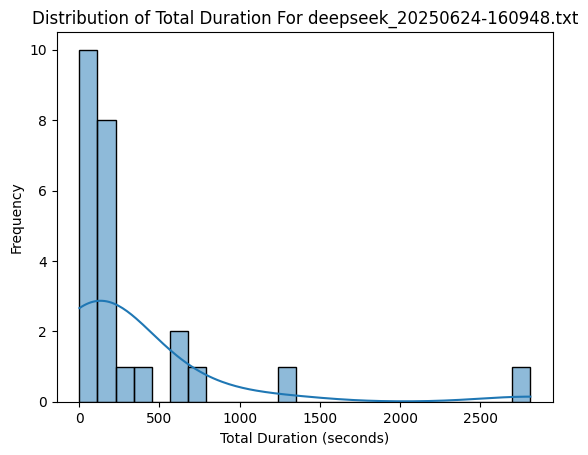

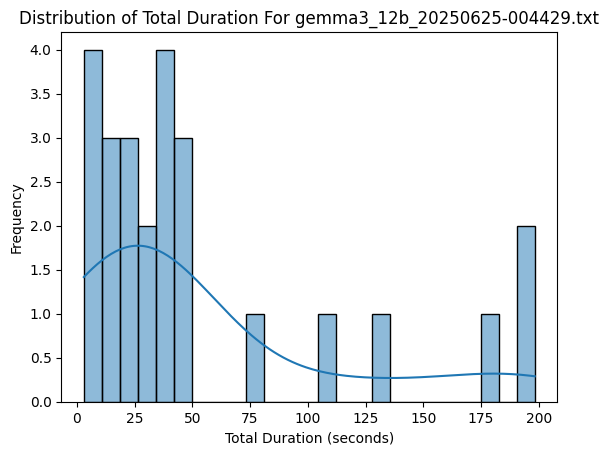

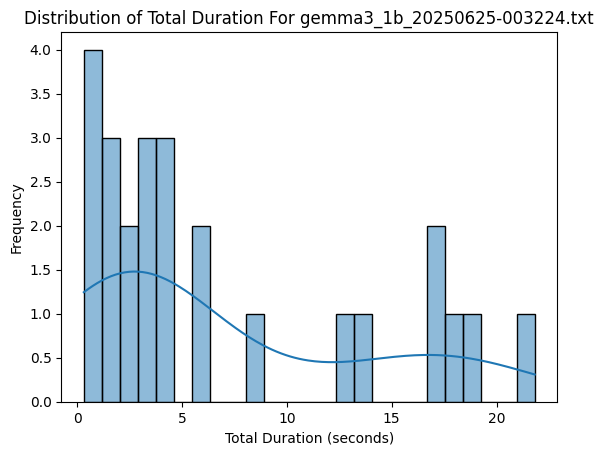

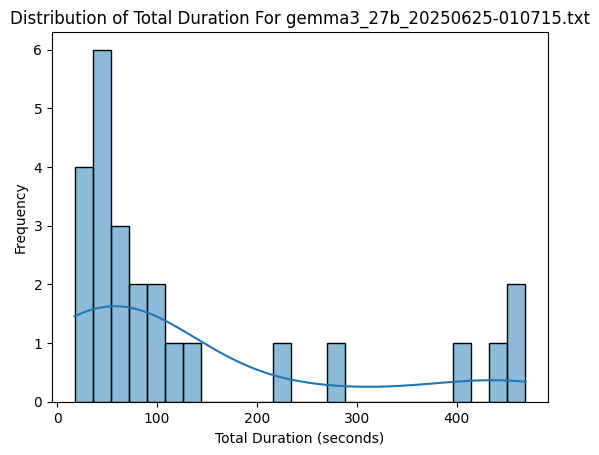

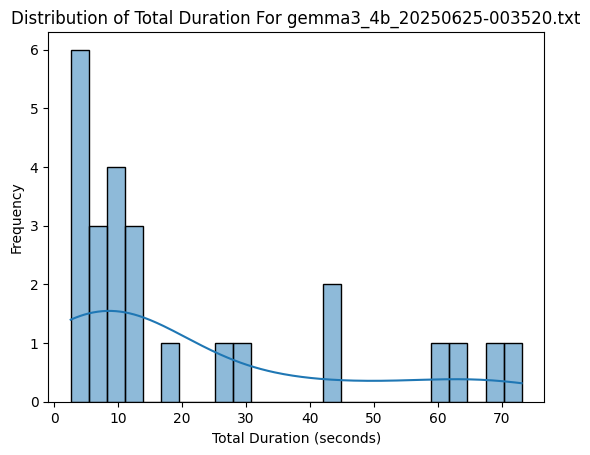

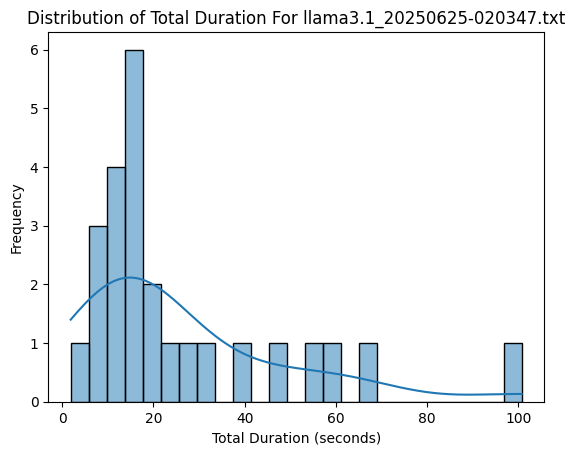

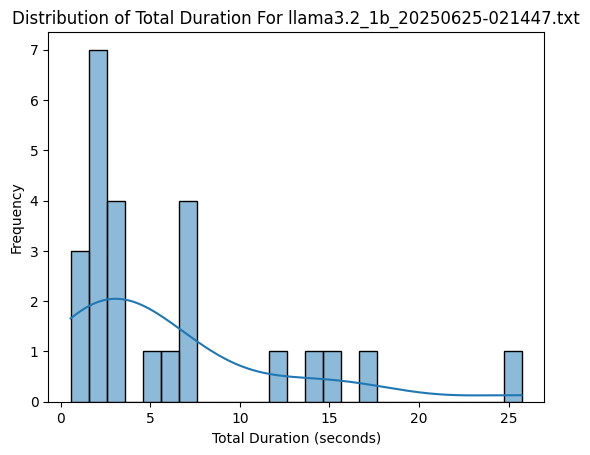

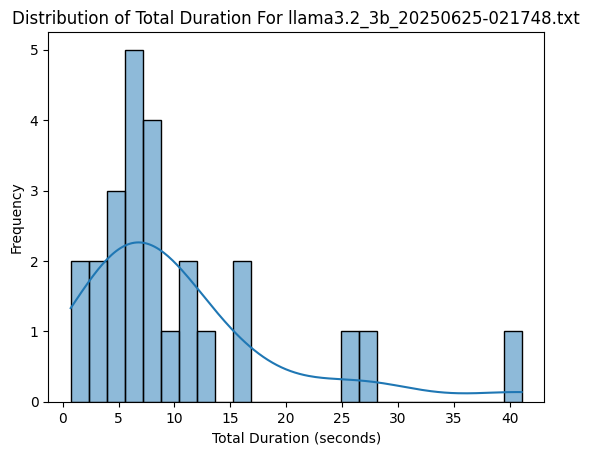

In [17]:
for key in df:

#Histogram of eval rate
    df[key]['total duration'] = pd.to_numeric(df[key]['total duration'])  # Convert or set invalids to NaN, likelt means our data is messy
    sns.histplot(df[key]['total duration'], bins=25, kde=True)
    plt.title("Distribution of Total Duration For " + key)
    plt.xlabel("Total Duration (seconds)")
    plt.ylabel("Frequency")
    plt.show()


In [18]:
#DO NOT RUN THIS, IT BREAKS EVERYTHING

# for name, df in df.items():
#     sns.scatterplot(data=df, x='prompt eval duration', y='prompt eval count')
#     plt.title(f'{name} - Prompt Eval Duration vs Count')
#     plt.tight_layout()
#     plt.show()

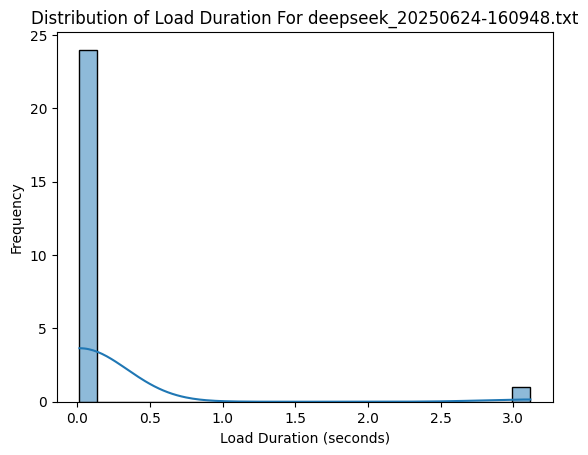

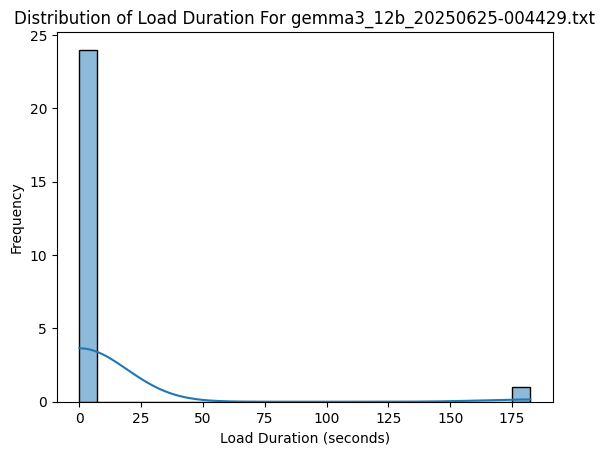

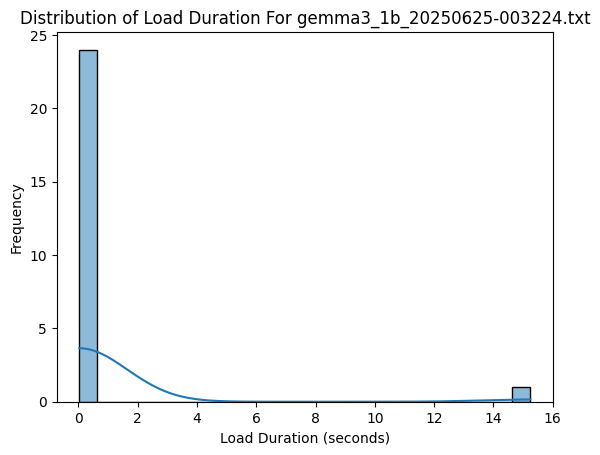

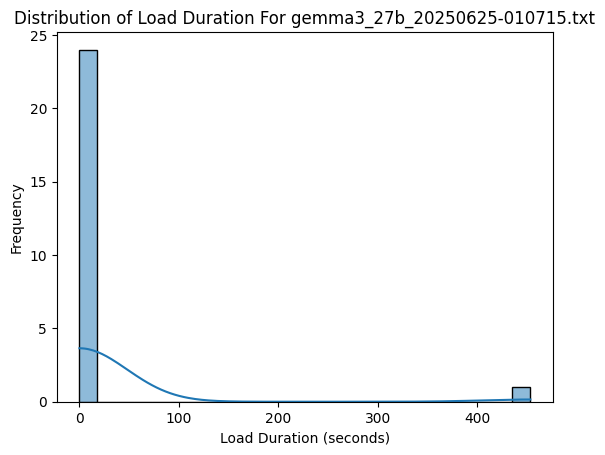

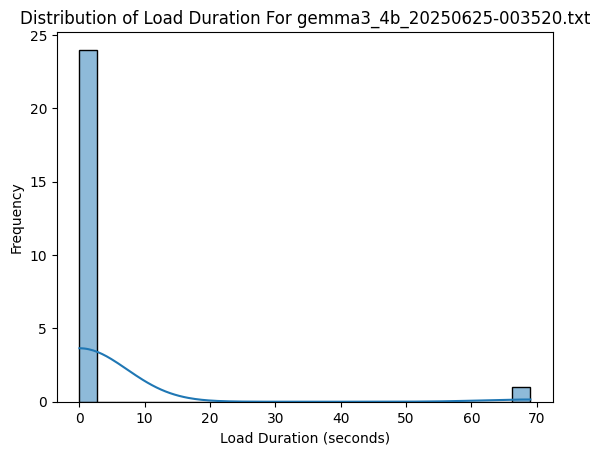

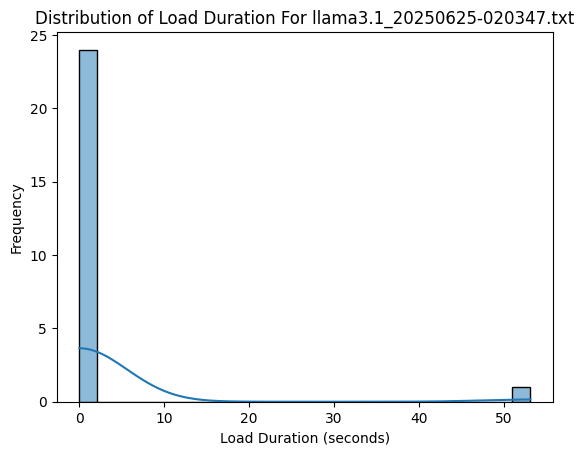

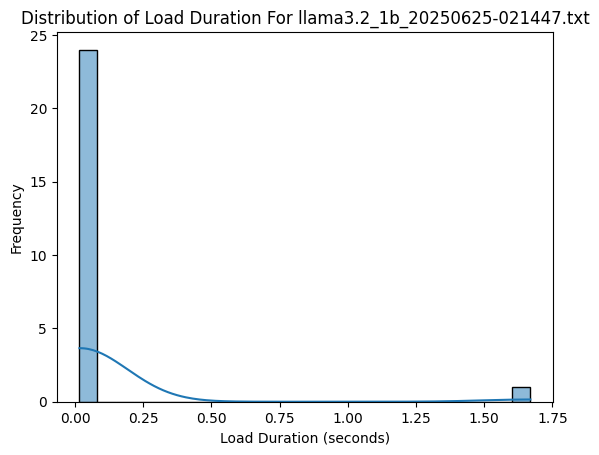

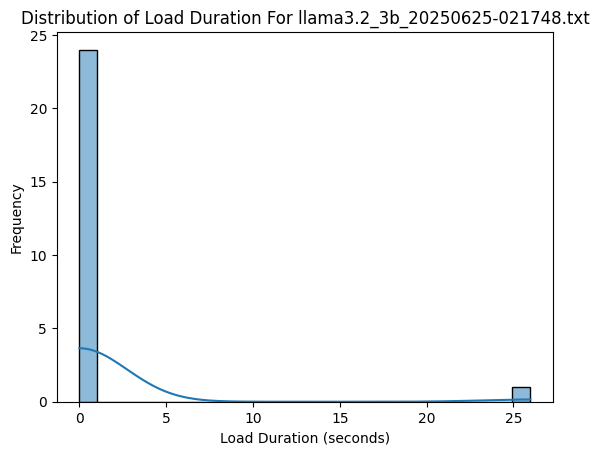

In [19]:
for key in df:

#Histogram of eval rate
    df[key]['load duration'] = pd.to_numeric(df[key]['load duration'])  # Convert or set invalids to NaN, likelt means our data is messy
    sns.histplot(df[key]['load duration'], bins=25, kde=True)
    plt.title("Distribution of Load Duration For " + key)
    plt.xlabel("Load Duration (seconds)")
    plt.ylabel("Frequency")
    plt.show()



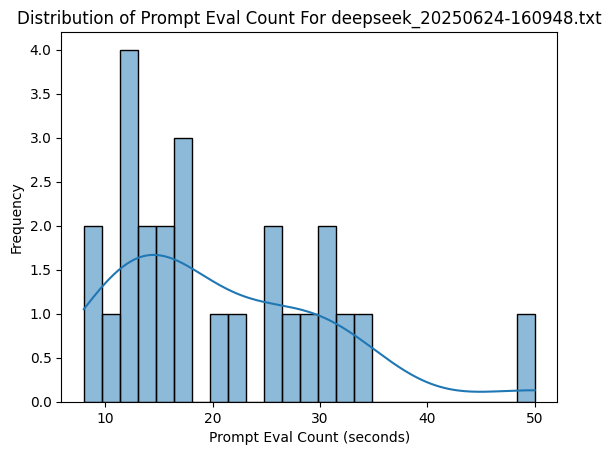

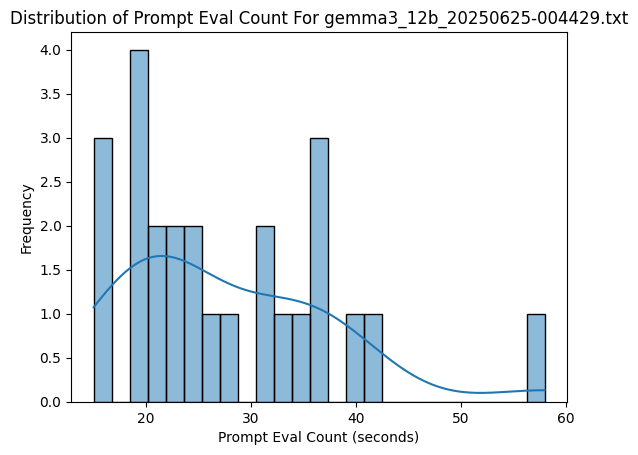

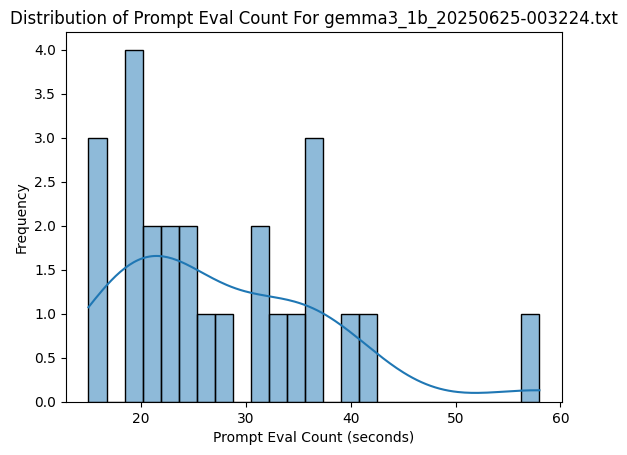

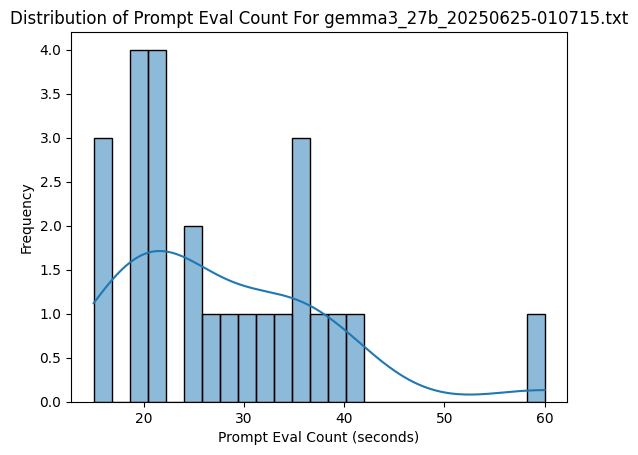

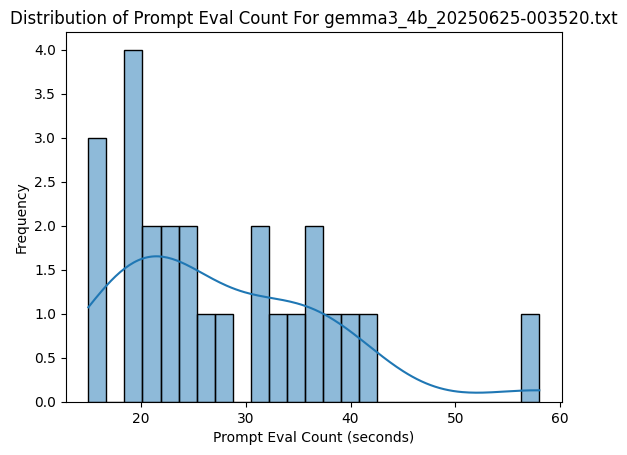

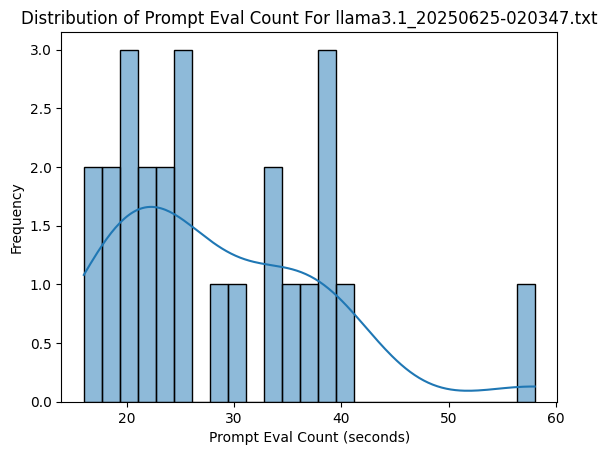

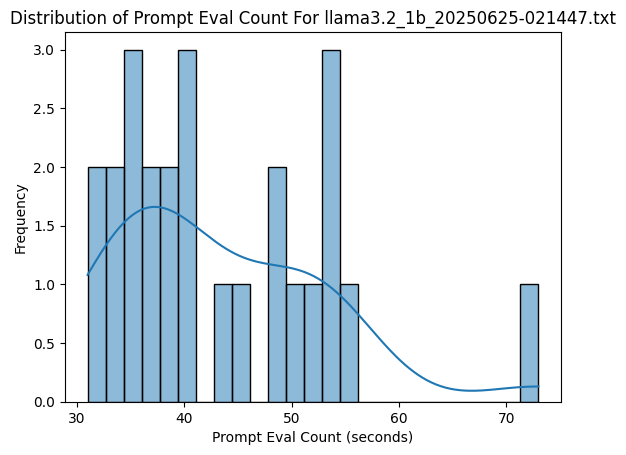

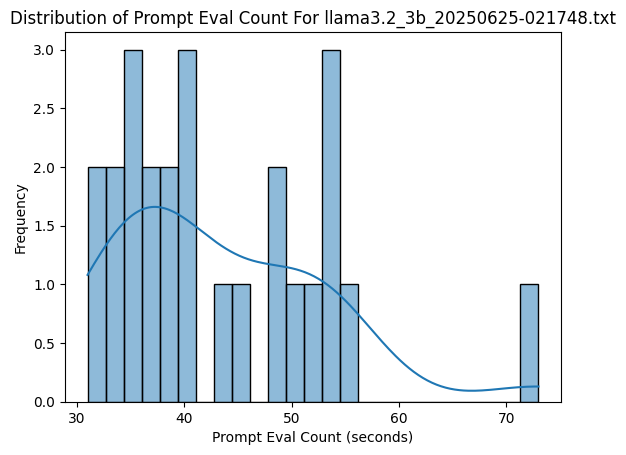

In [20]:
for key in df:

#Histogram of eval rate
    df[key]['prompt eval count'] = pd.to_numeric(df[key]['prompt eval count'])  # Convert or set invalids to NaN, likelt means our data is messy
    sns.histplot(df[key]['prompt eval count'], bins=25, kde=True)
    plt.title("Distribution of Prompt Eval Count For " + key)
    plt.xlabel("Prompt Eval Count (seconds)")
    plt.ylabel("Frequency")
    plt.show()



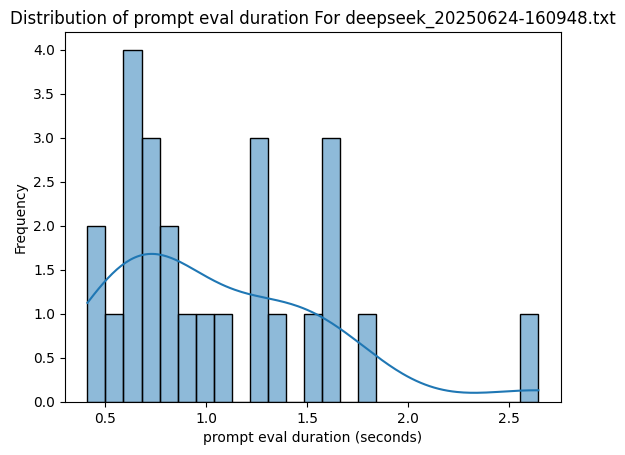

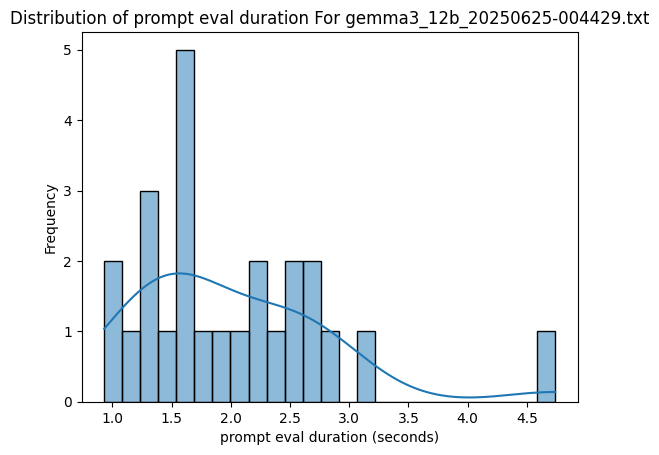

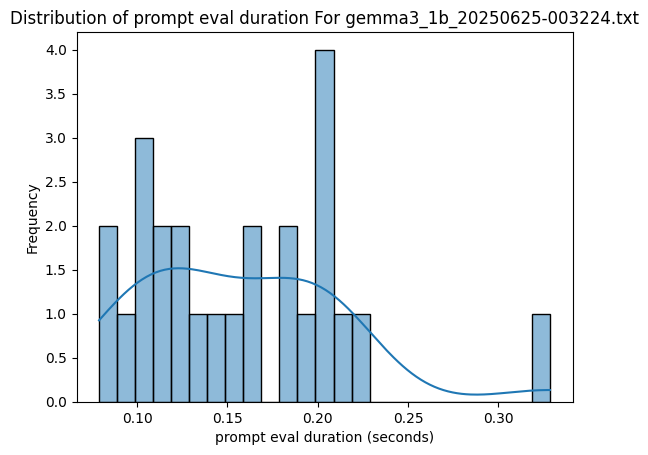

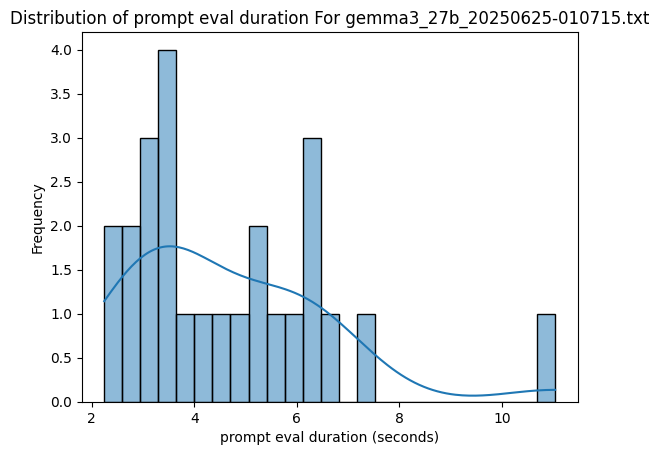

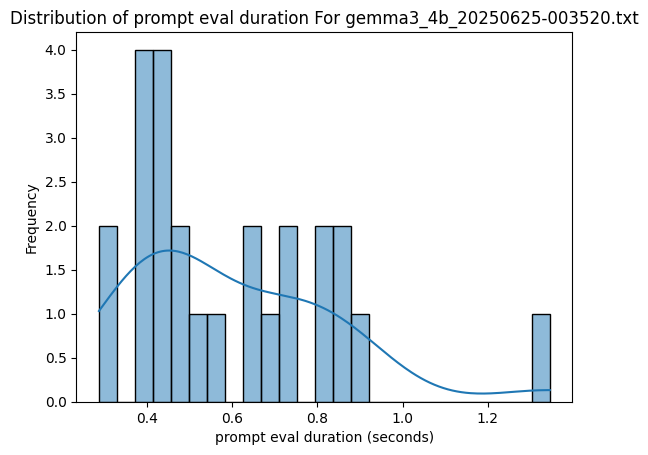

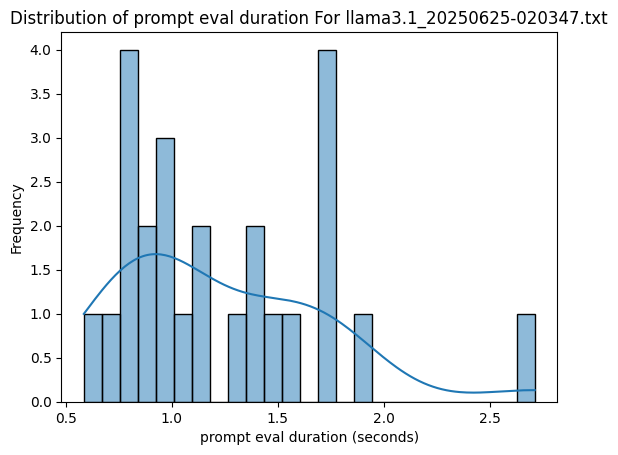

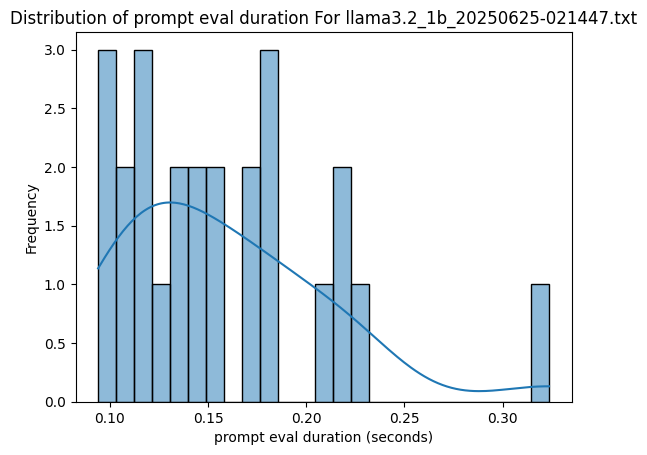

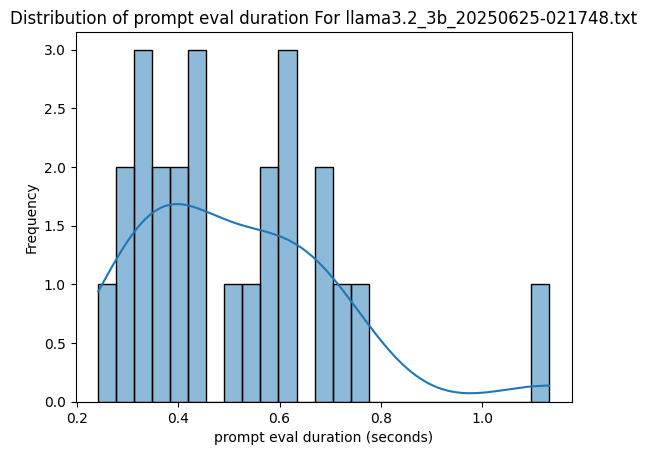

In [21]:
for key in df:

#Histogram of eval rate
    df[key]['prompt eval duration'] = pd.to_numeric(df[key]['prompt eval duration'])  # Convert or set invalids to NaN, likelt means our data is messy
    sns.histplot(df[key]['prompt eval duration'], bins=25, kde=True)
    plt.title("Distribution of prompt eval duration For " + key)
    plt.xlabel("prompt eval duration (seconds)")
    plt.ylabel("Frequency")
    plt.show()



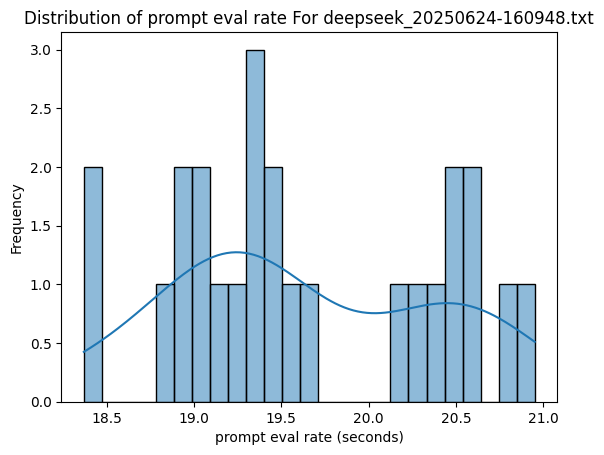

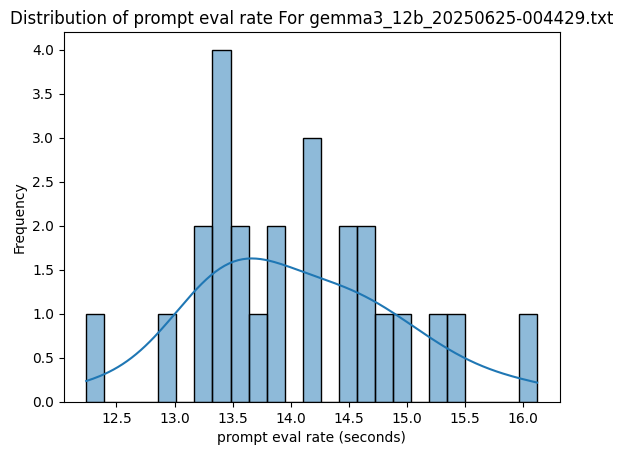

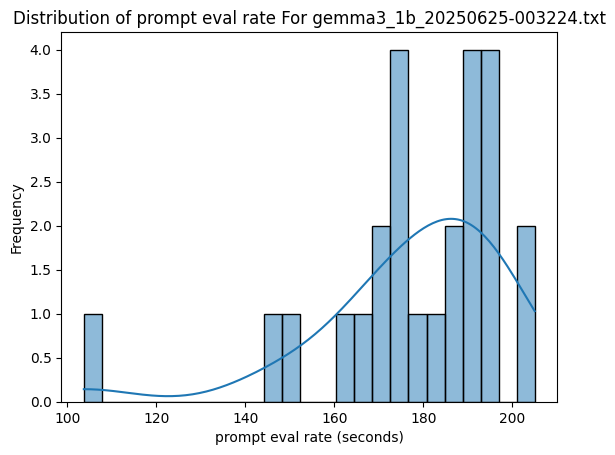

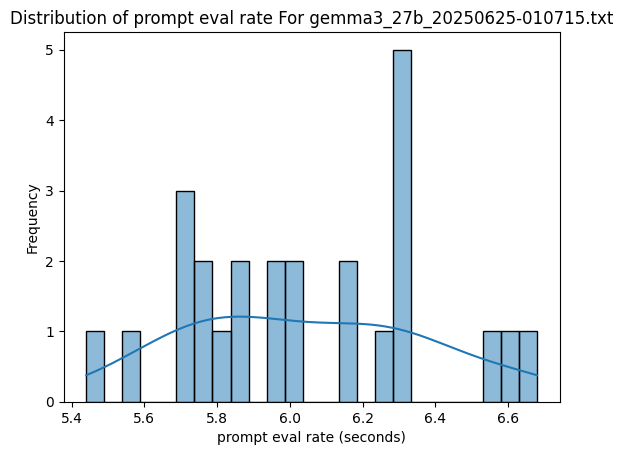

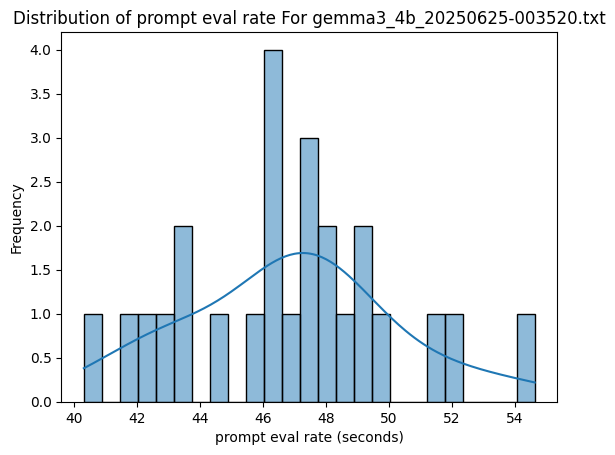

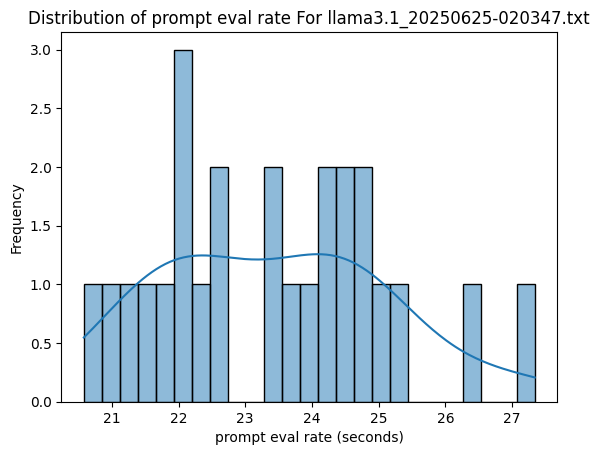

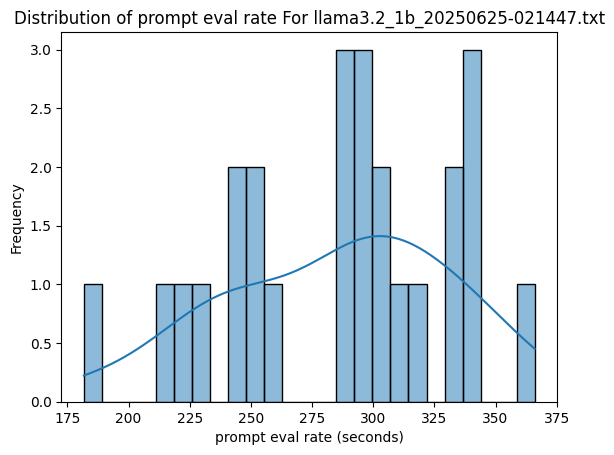

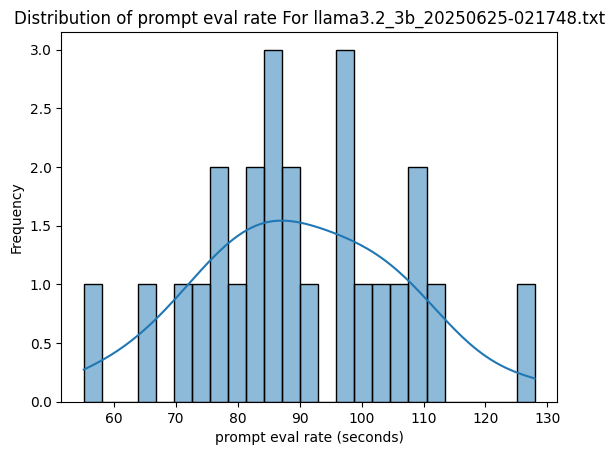

In [22]:
for key in df:

#Histogram of eval rate
    df[key]['prompt eval rate'] = pd.to_numeric(df[key]['prompt eval rate'])  # Convert or set invalids to NaN, likelt means our data is messy
    sns.histplot(df[key]['prompt eval rate'], bins=25, kde=True)
    plt.title("Distribution of prompt eval rate For " + key)
    plt.xlabel("prompt eval rate (seconds)")
    plt.ylabel("Frequency")
    plt.show()



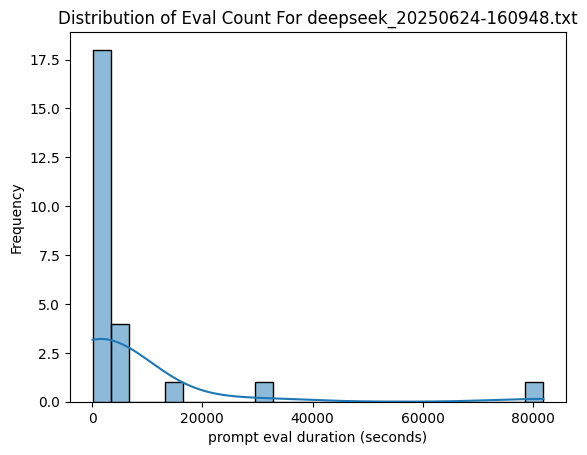

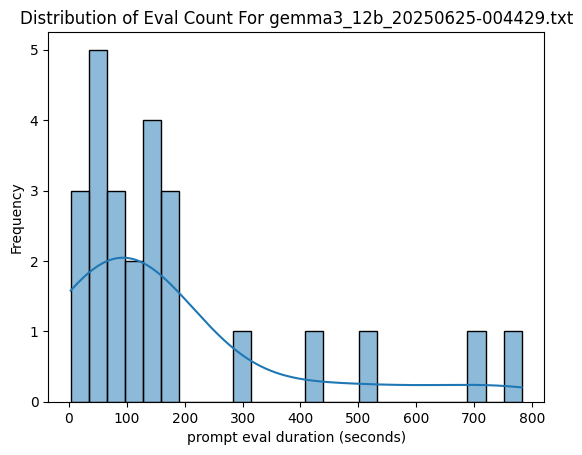

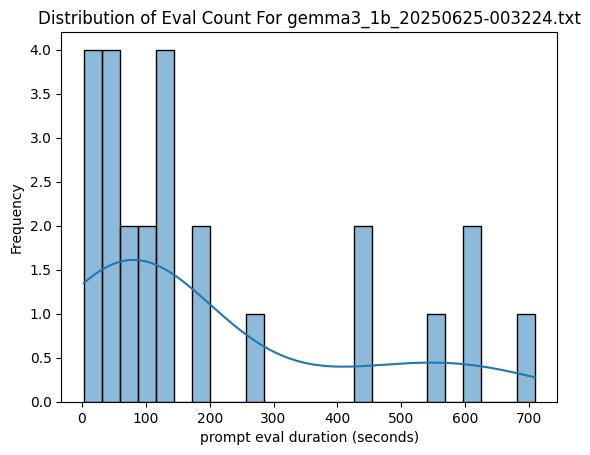

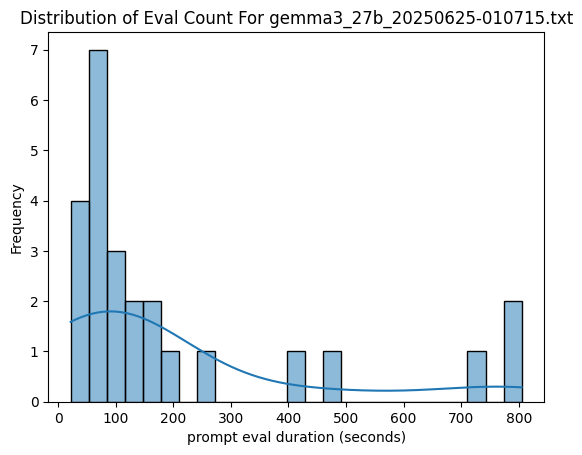

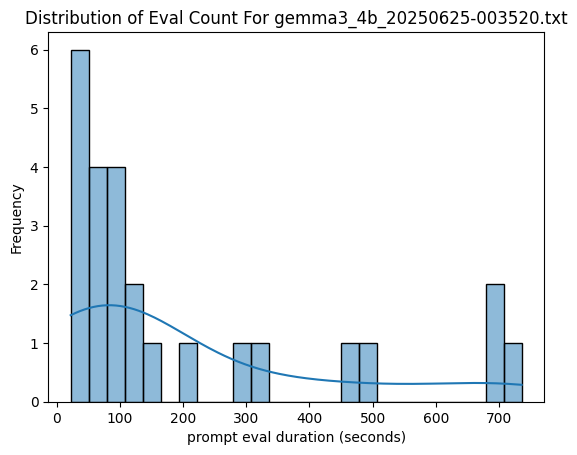

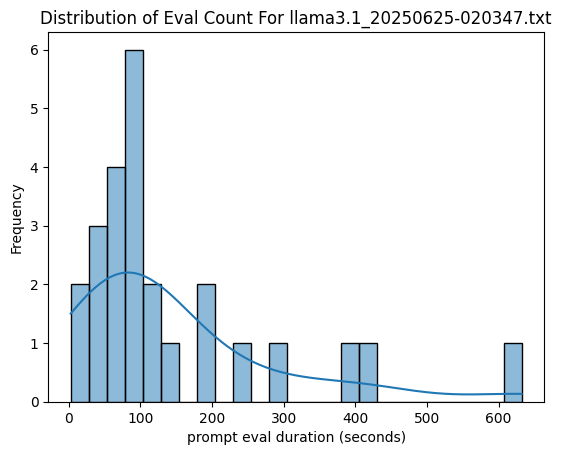

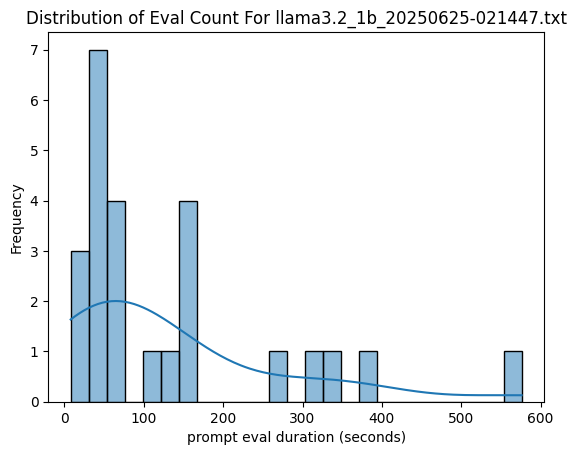

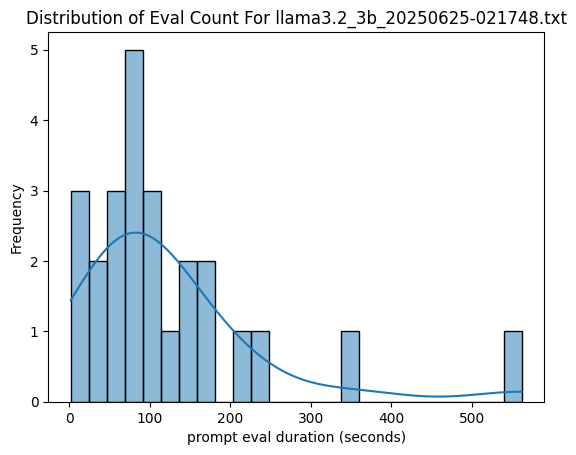

In [23]:
for key in df:

#Histogram of eval rate
    df[key]['eval count'] = pd.to_numeric(df[key]['eval count'])  # Convert or set invalids to NaN, likelt means our data is messy
    sns.histplot(df[key]['eval count'], bins=25, kde=True)
    plt.title("Distribution of Eval Count For " + key)
    plt.xlabel("prompt eval duration (seconds)")
    plt.ylabel("Frequency")
    plt.show()



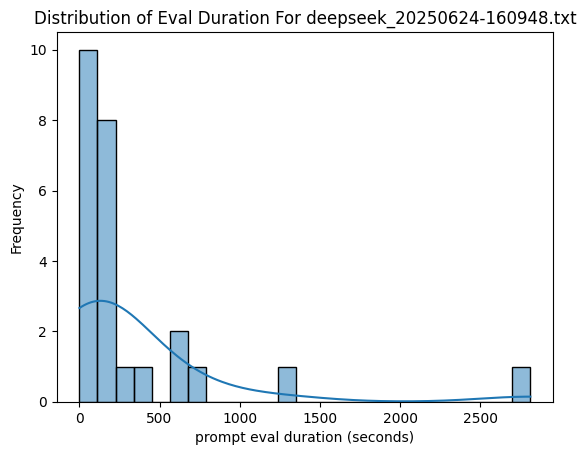

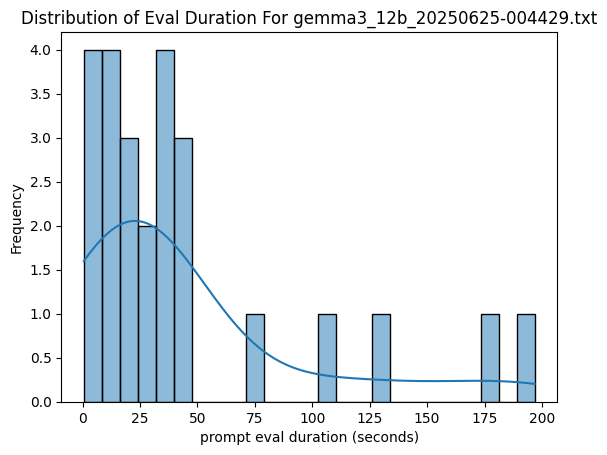

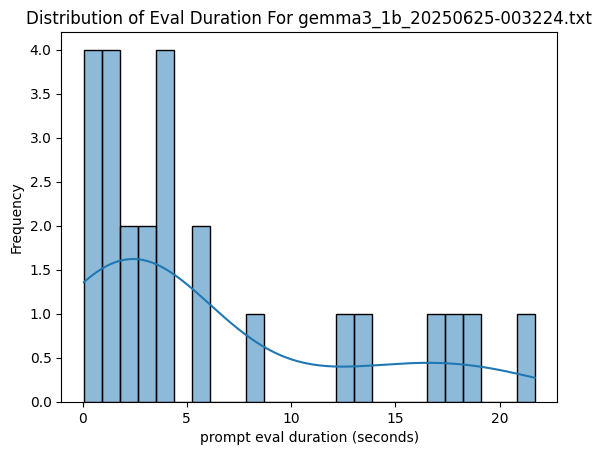

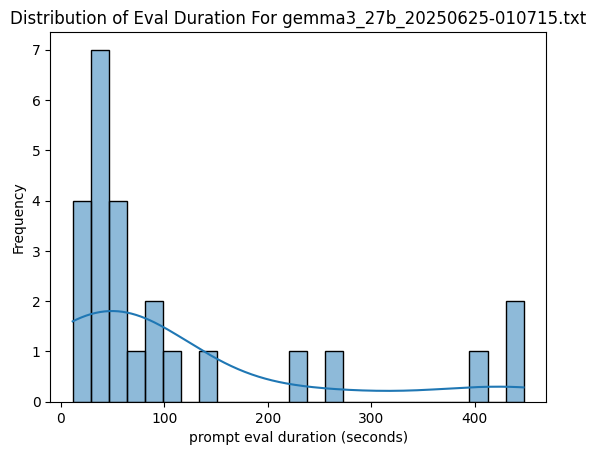

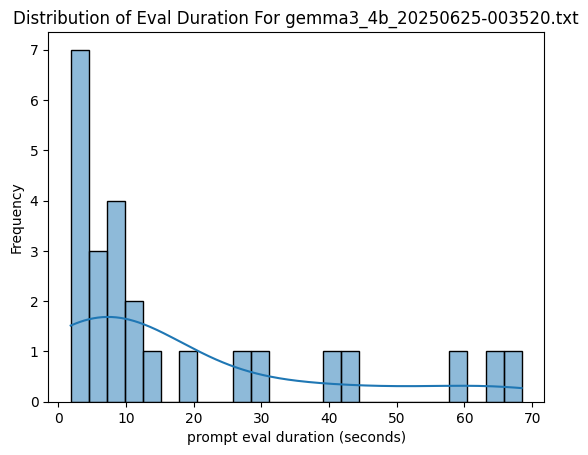

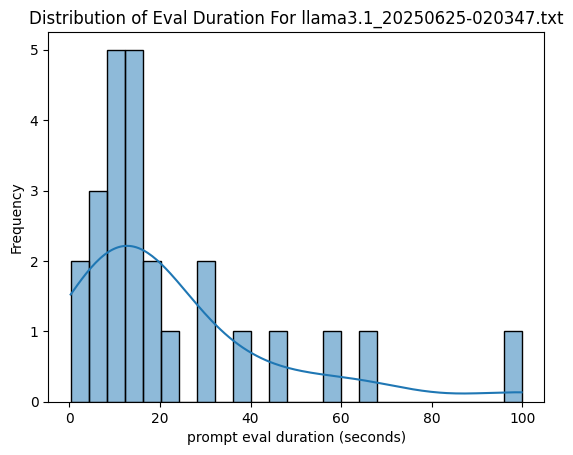

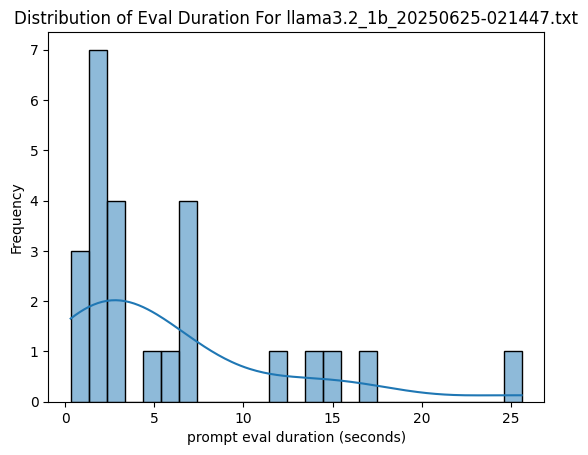

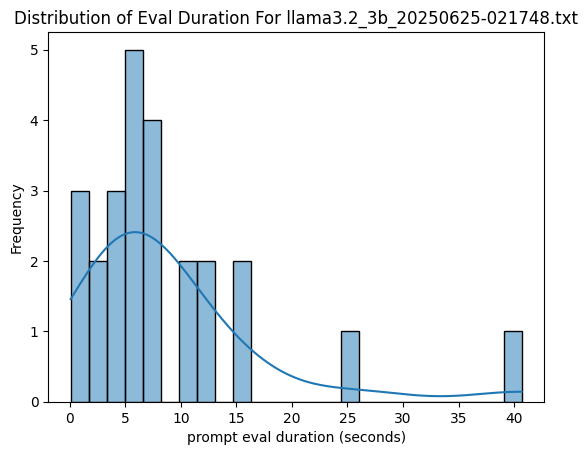

In [24]:
for key in df:

#Histogram of eval rate
    df[key]['eval duration'] = pd.to_numeric(df[key]['eval duration'])  # Convert or set invalids to NaN, likelt means our data is messy
    sns.histplot(df[key]['eval duration'], bins=25, kde=True)
    plt.title("Distribution of Eval Duration For " + key)
    plt.xlabel("prompt eval duration (seconds)")
    plt.ylabel("Frequency")
    plt.show()



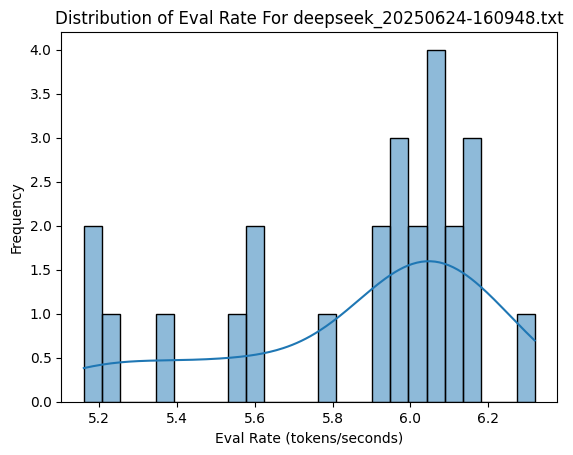

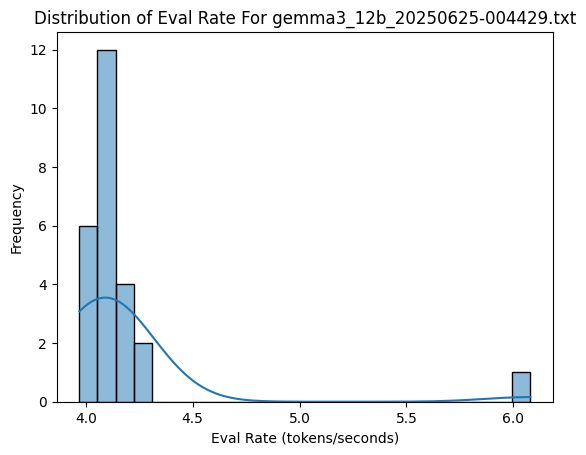

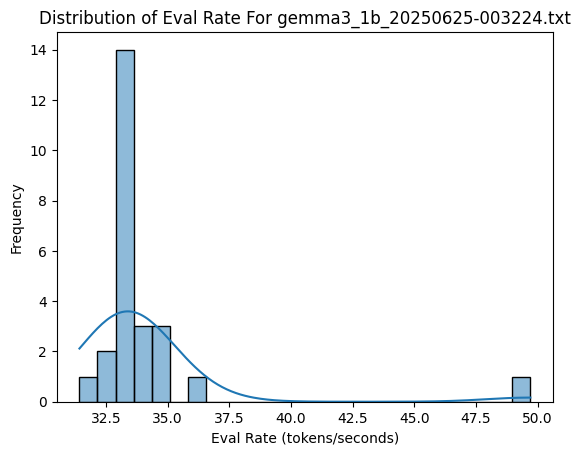

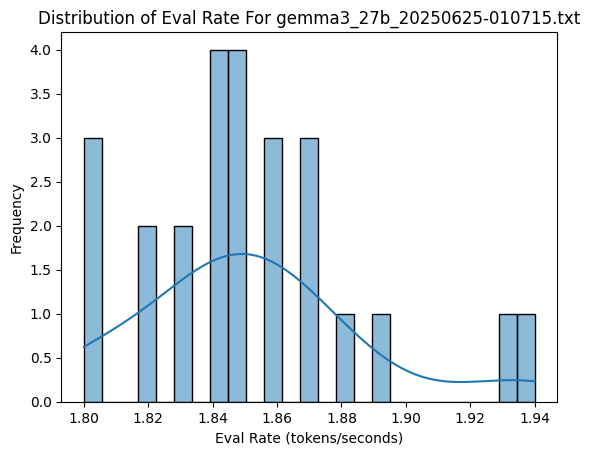

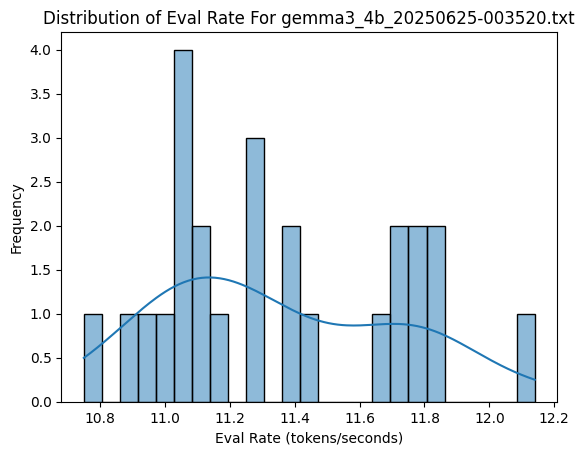

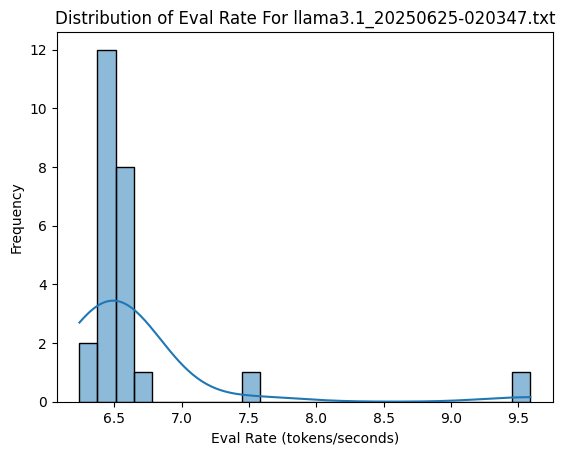

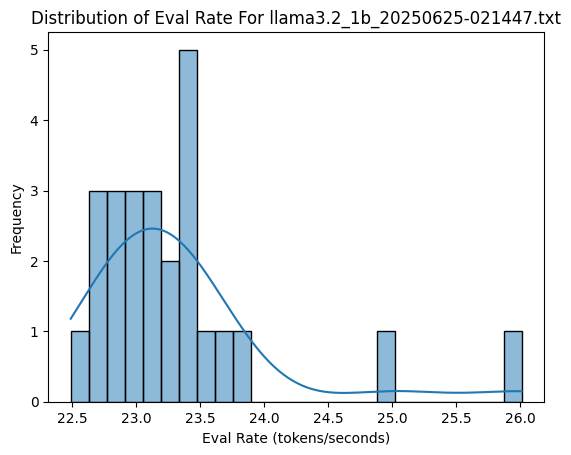

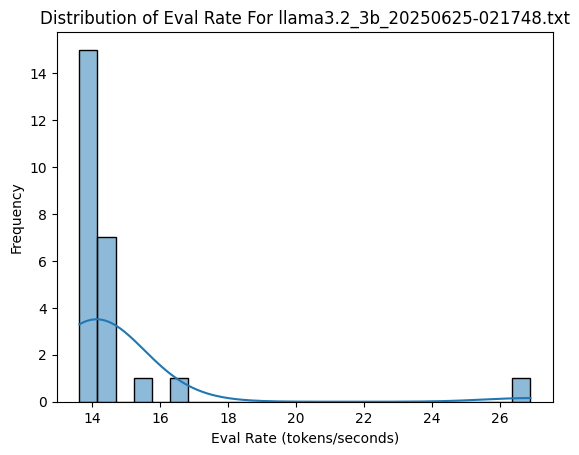

In [25]:
for key in df:

#Histogram of eval rate
    df[key]['eval rate'] = pd.to_numeric(df[key]['eval rate'])  # Convert or set invalids to NaN, likelt means our data is messy
    sns.histplot(df[key]['eval rate'], bins=25, kde=True)
    plt.title("Distribution of Eval Rate For " + key)
    plt.xlabel("Eval Rate (tokens/seconds)")
    plt.ylabel("Frequency")
    plt.show()



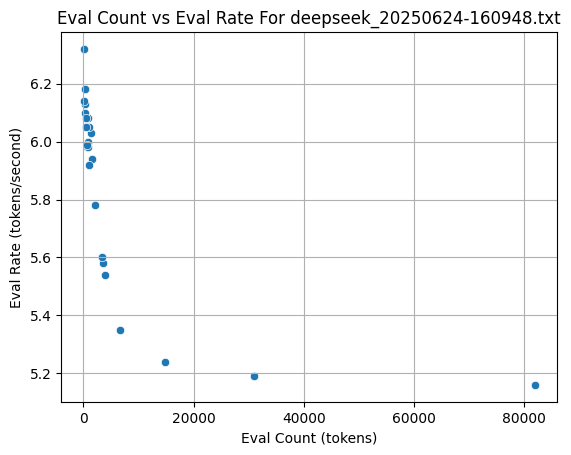

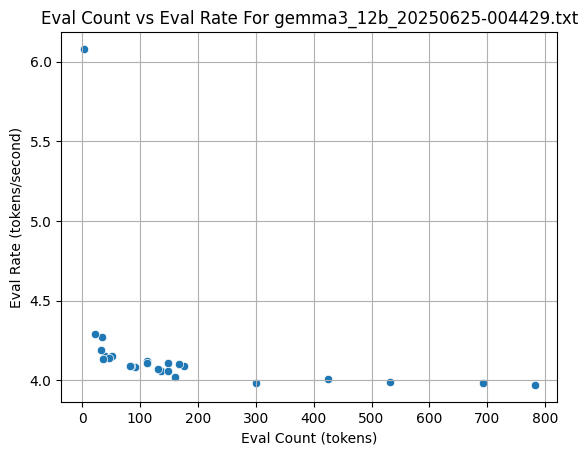

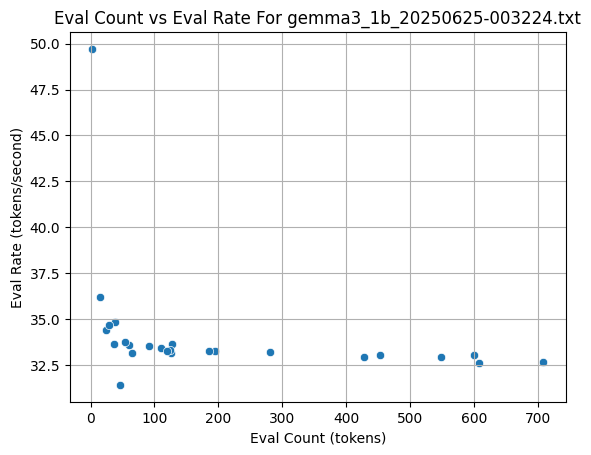

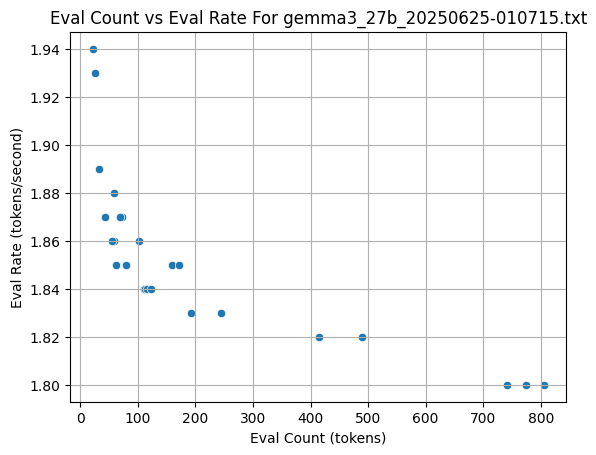

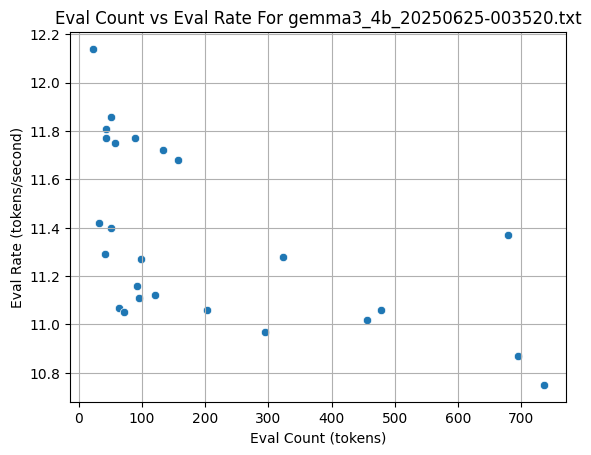

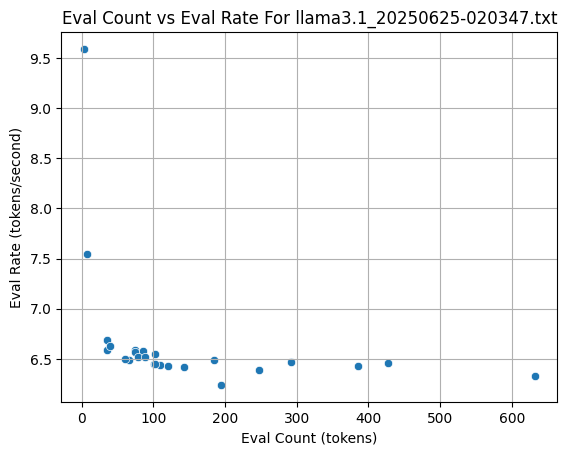

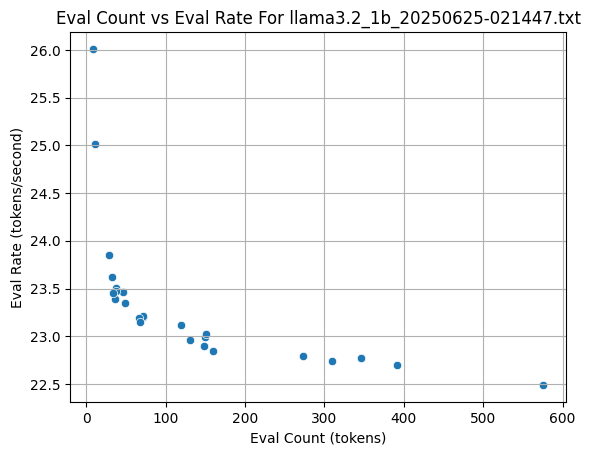

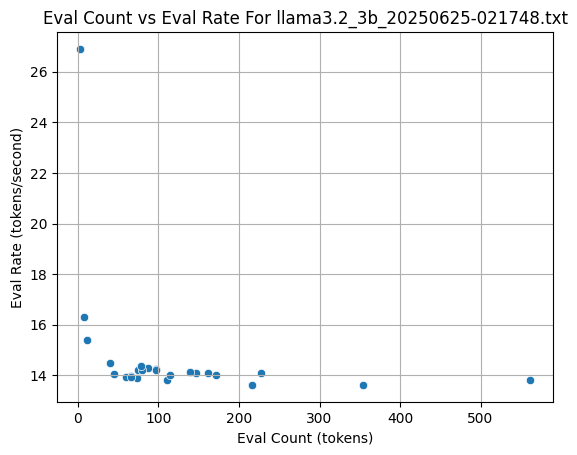

In [26]:
for key in df:
    # Ensure numeric types for both columns
    df[key]['eval count'] = pd.to_numeric(df[key]['eval count'], errors='coerce')
    df[key]['eval rate'] = pd.to_numeric(df[key]['eval rate'], errors='coerce')

    # Scatter plot of eval rate vs load duration
    sns.scatterplot(x=df[key]['eval count'], y=df[key]['eval rate'])
    plt.title("Eval Count vs Eval Rate For " + key)
    plt.xlabel("Eval Count (tokens)")
    plt.ylabel("Eval Rate (tokens/second)")
    plt.grid(True)
    plt.show()


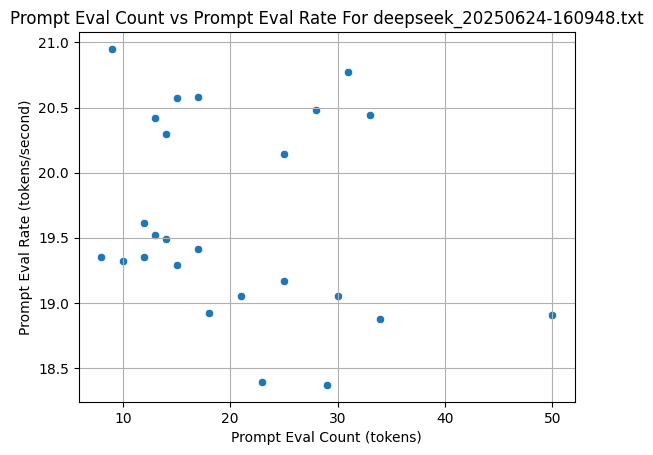

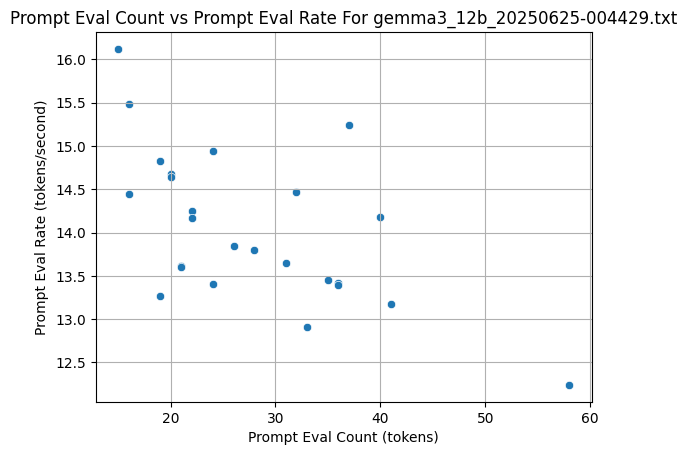

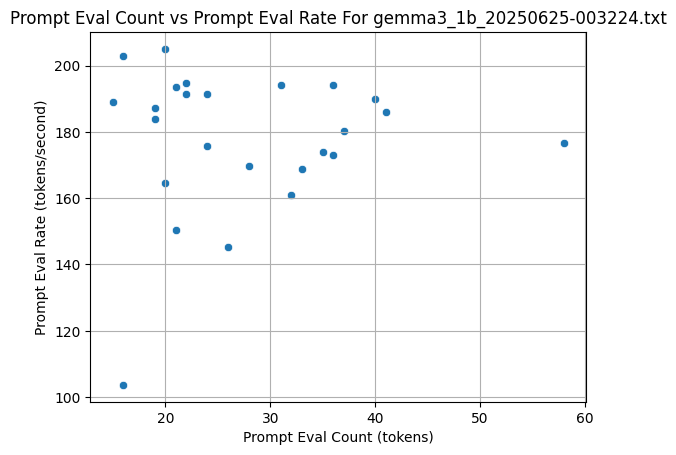

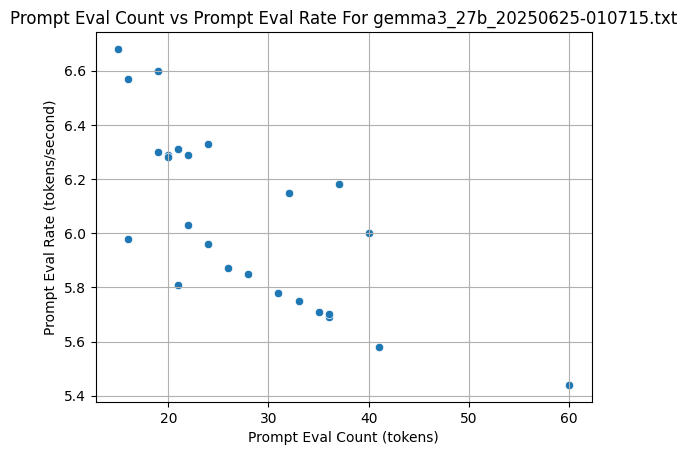

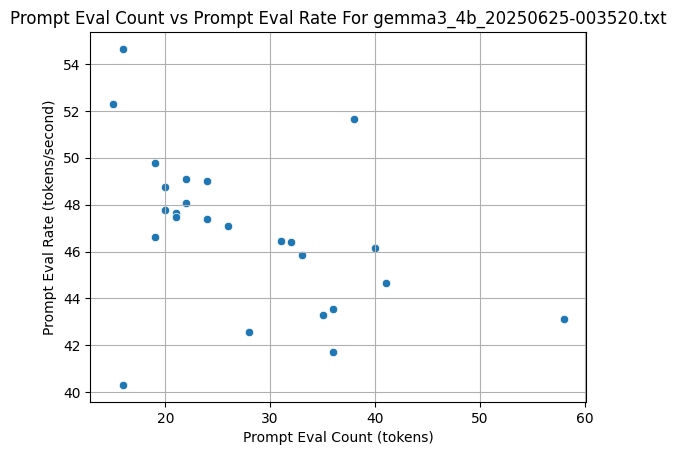

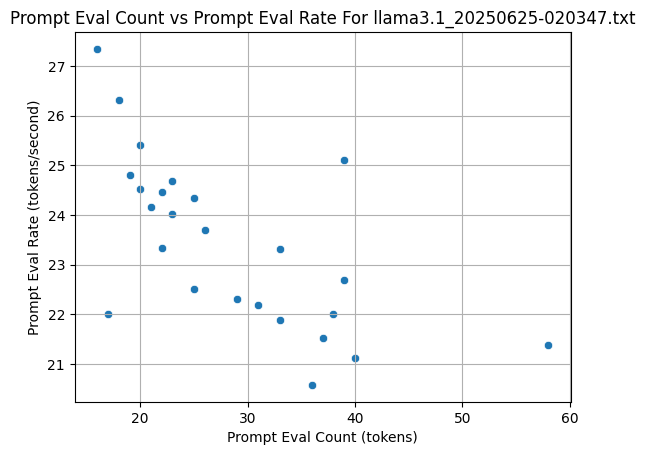

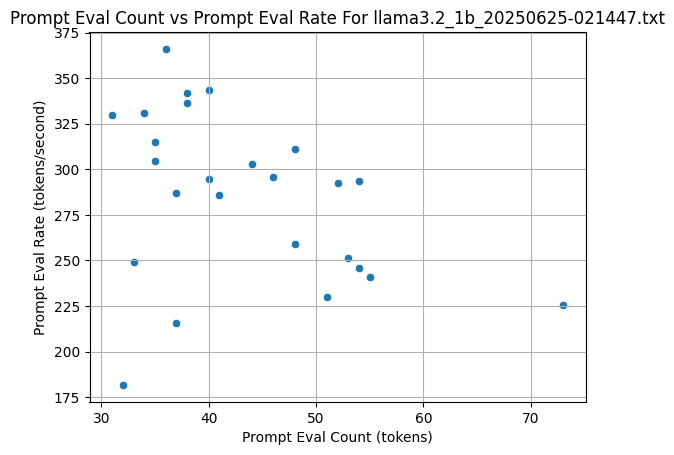

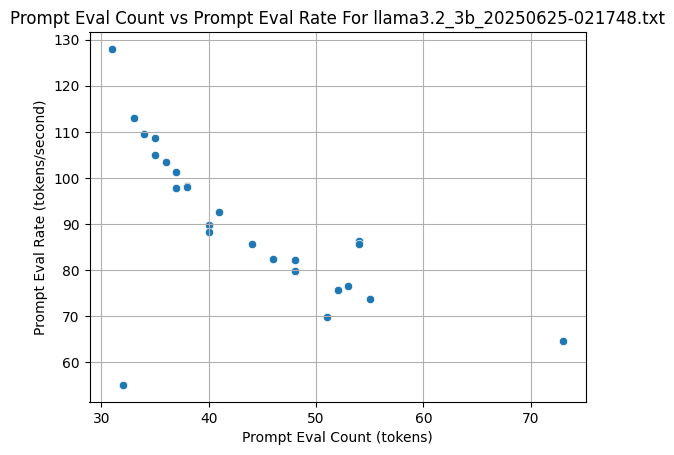

In [27]:
for key in df:
    # Ensure numeric types for both columns
    df[key]['prompt eval count'] = pd.to_numeric(df[key]['prompt eval count'], errors='coerce')
    df[key]['prompt eval rate'] = pd.to_numeric(df[key]['prompt eval rate'], errors='coerce')

    # Scatter plot of eval rate vs load duration
    sns.scatterplot(x=df[key]['prompt eval count'], y=df[key]['prompt eval rate'])
    plt.title("Prompt Eval Count vs Prompt Eval Rate For " + key)
    plt.xlabel("Prompt Eval Count (tokens)")
    plt.ylabel("Prompt Eval Rate (tokens/second)")
    plt.grid(True)
    plt.show()


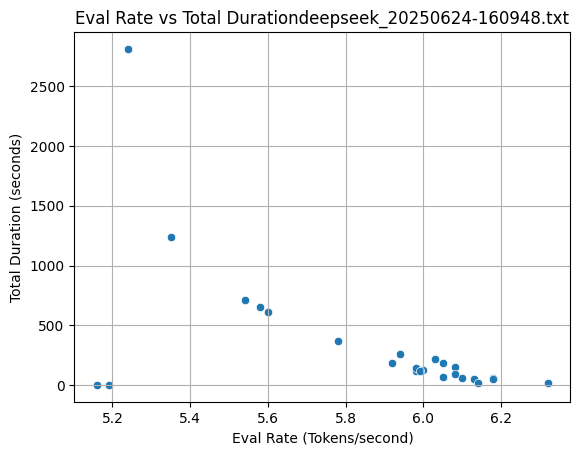

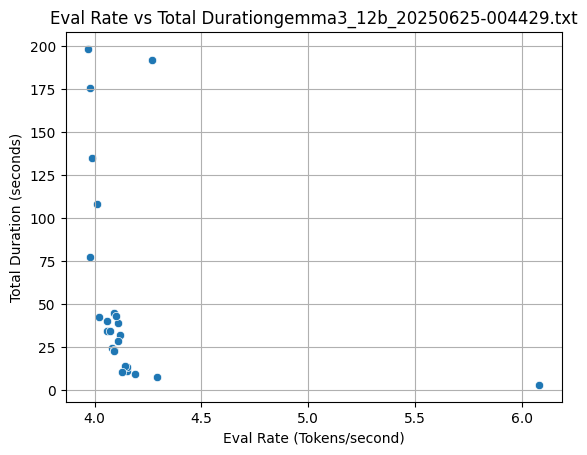

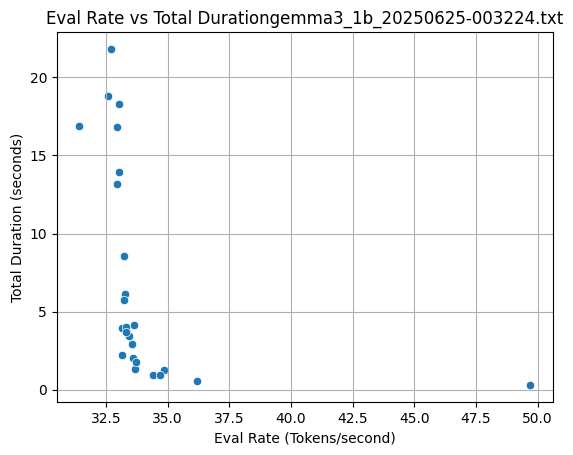

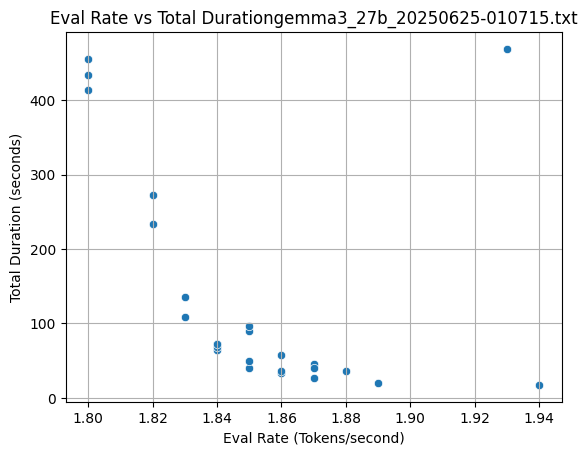

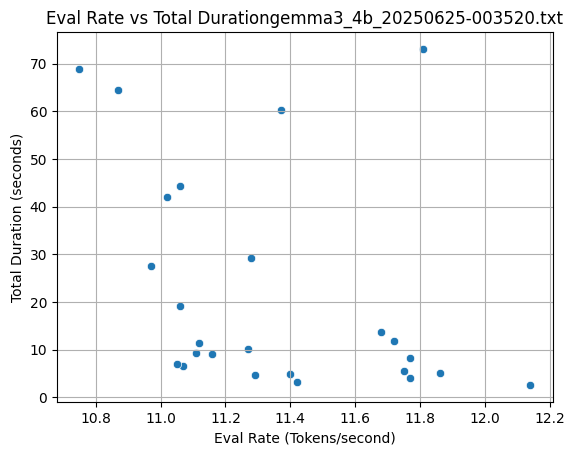

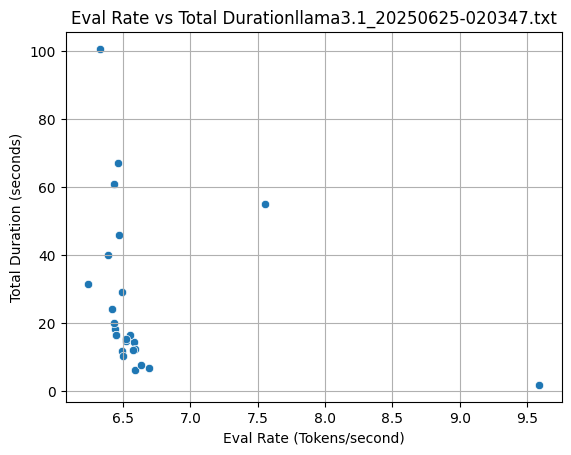

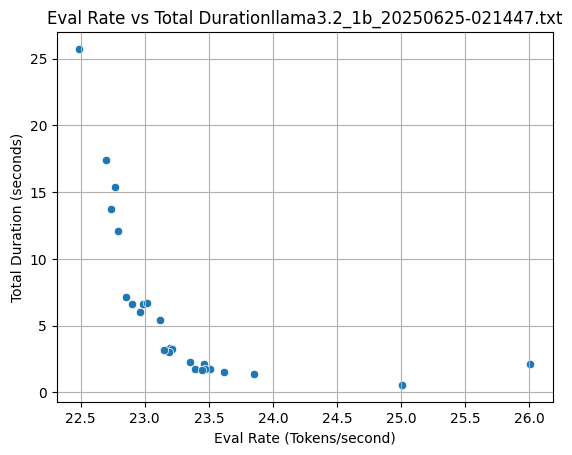

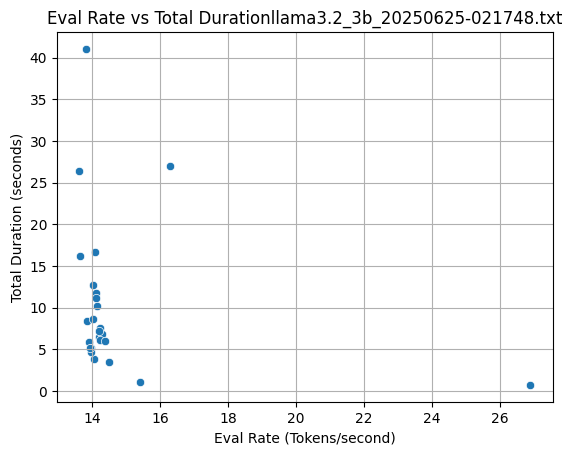

In [28]:
#Do models that process tokens faster spend less time, if not, there are inefficiencies in preprocesisng or loading

for key in df:
    # Ensure numeric types for both columns
    df[key]['eval rate'] = pd.to_numeric(df[key]['eval rate'], errors='coerce')
    df[key]['total duration'] = pd.to_numeric(df[key]['total duration'], errors='coerce')

    # Scatter plot of eval rate vs load duration
    sns.scatterplot(x=df[key]['eval rate'], y=df[key]['total duration'])
    plt.title("Eval Rate vs Total Duration" + key)
    plt.xlabel("Eval Rate (Tokens/second)")
    plt.ylabel("Total Duration (seconds)")
    plt.grid(True)
    plt.show()


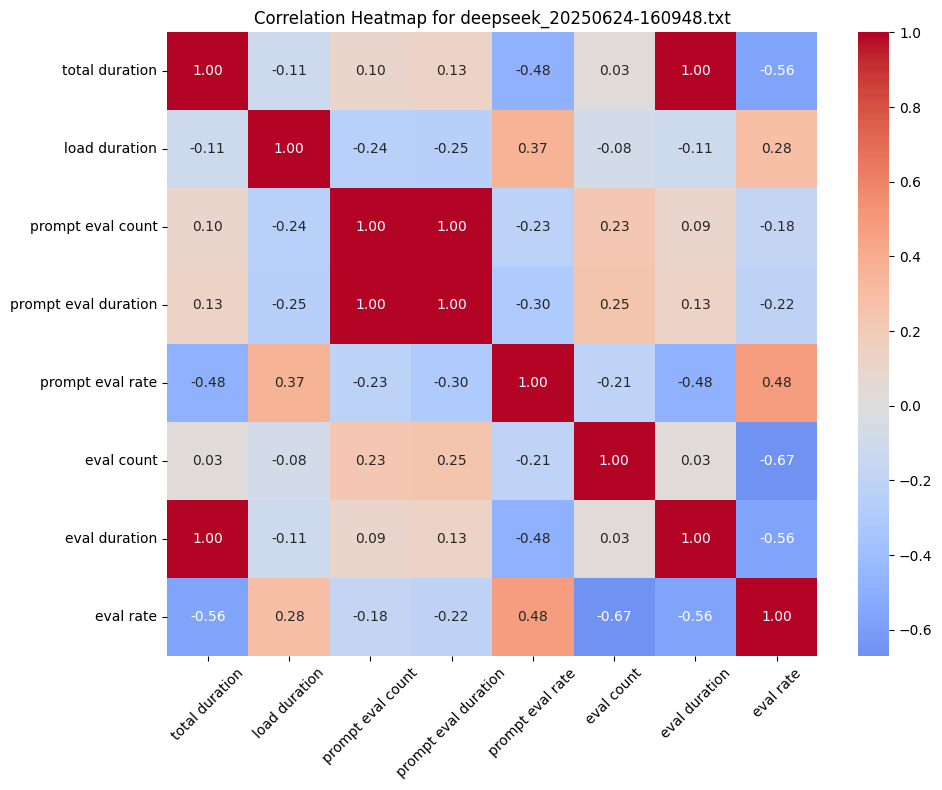

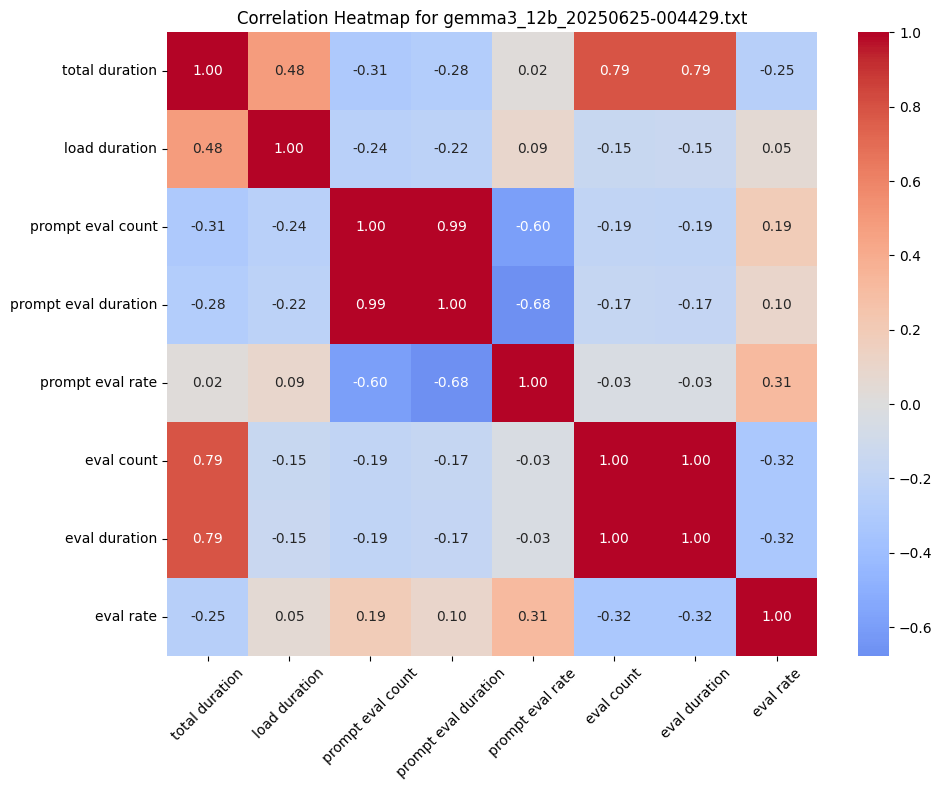

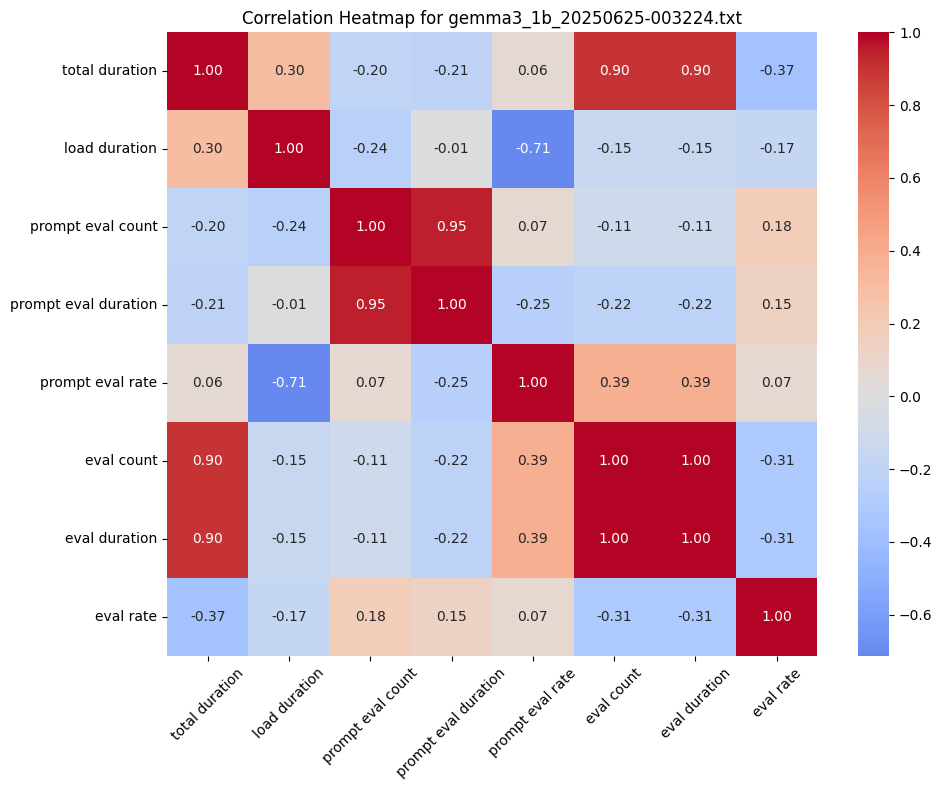

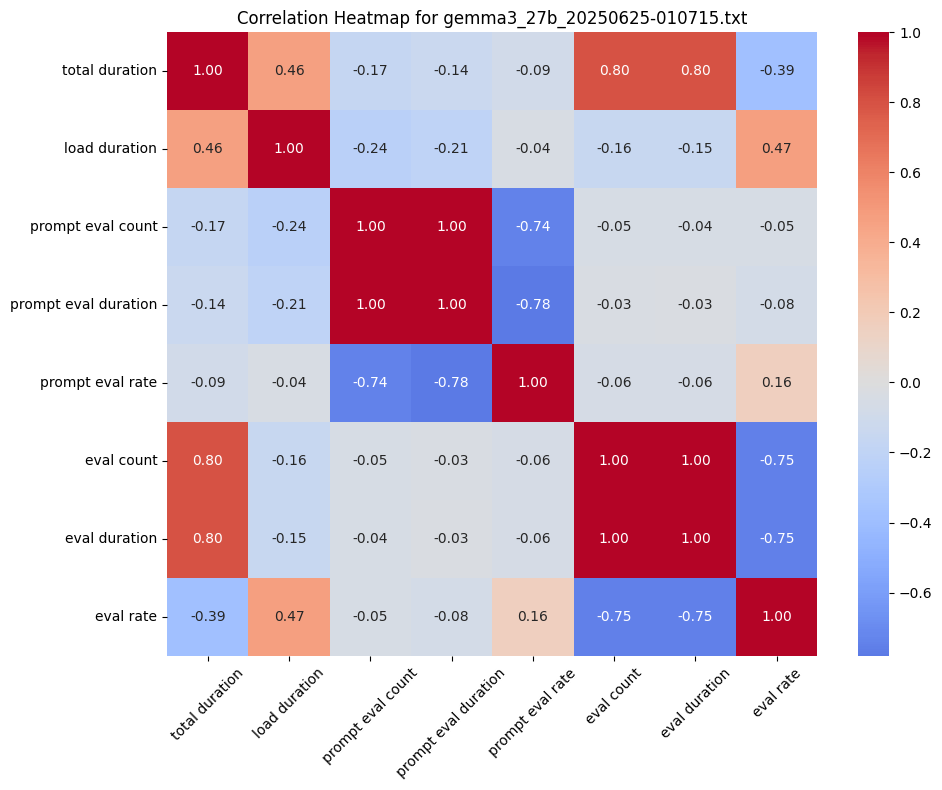

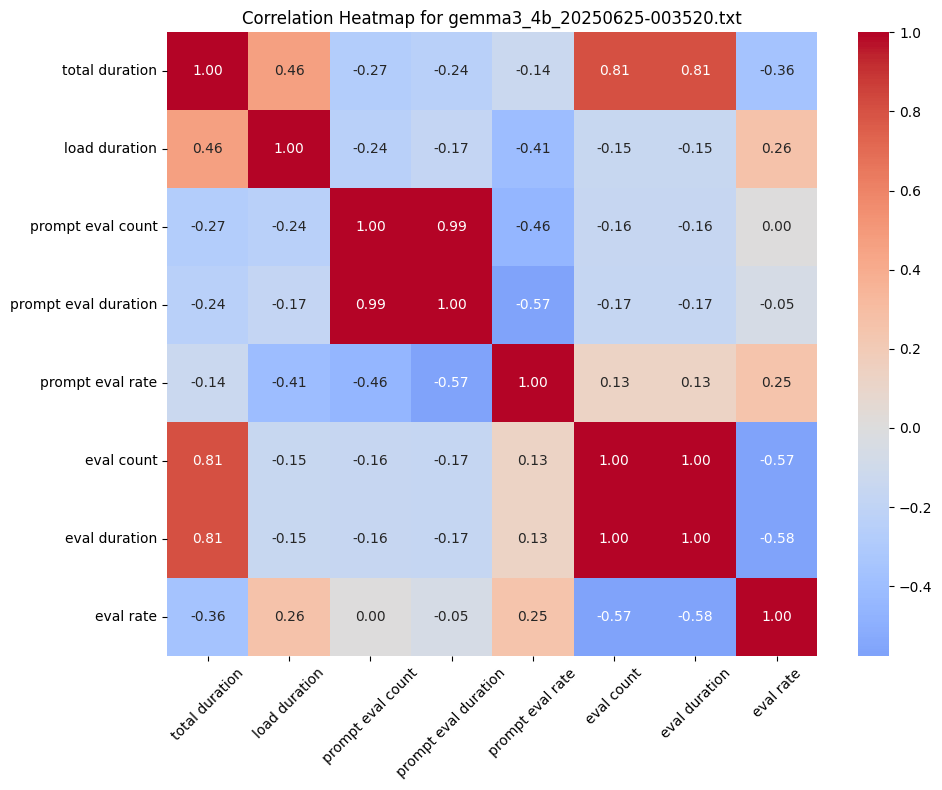

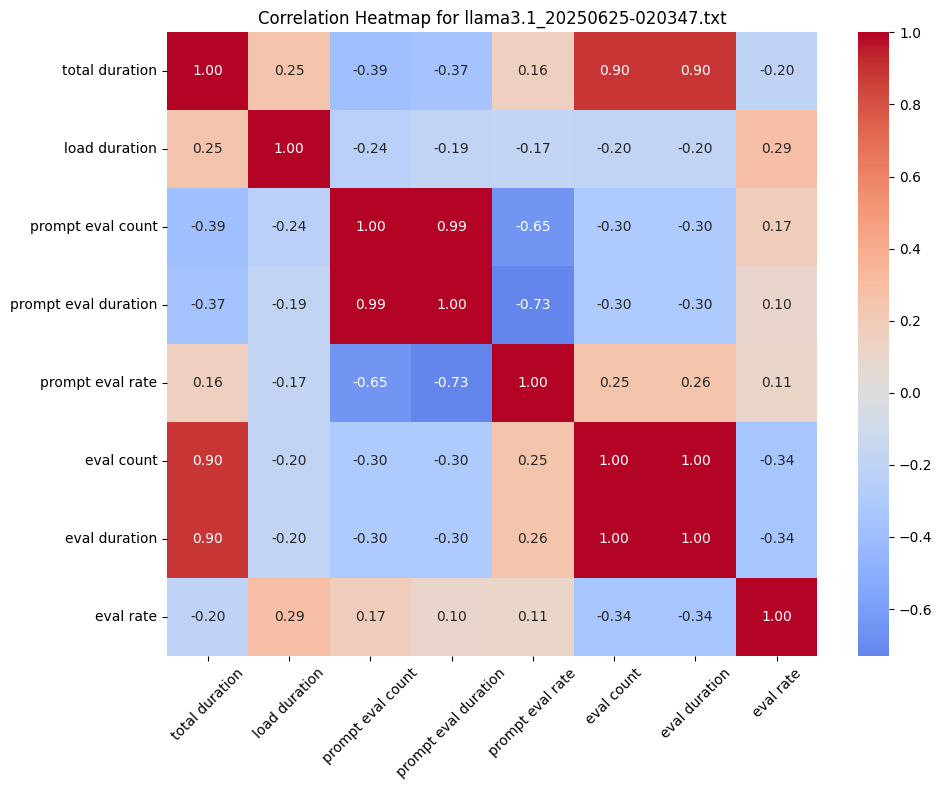

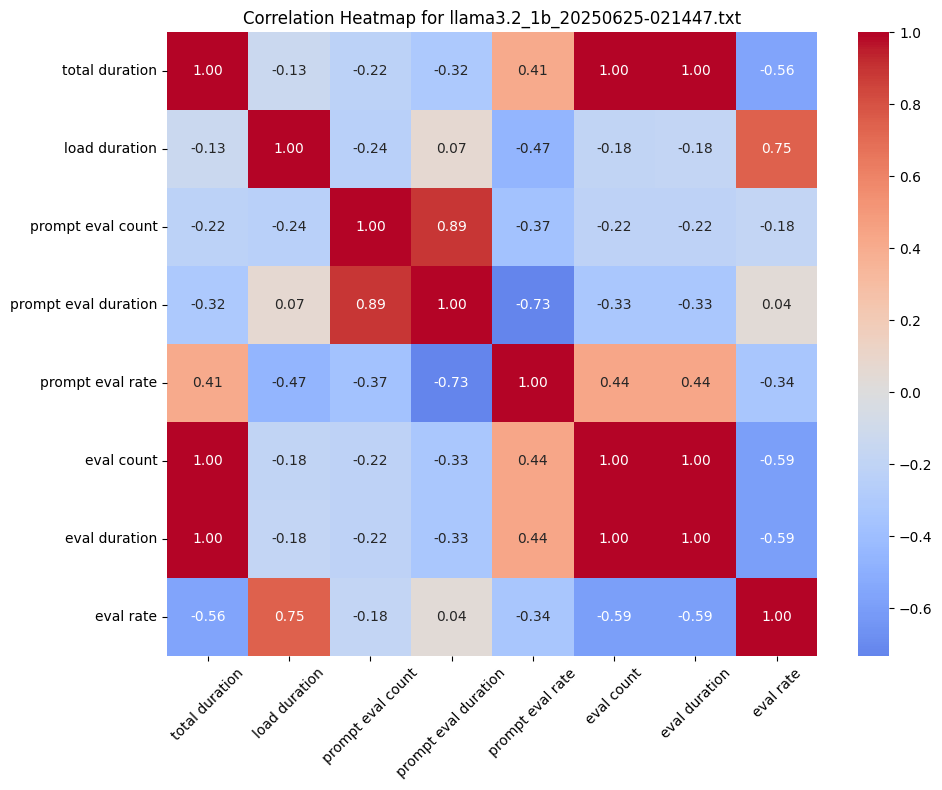

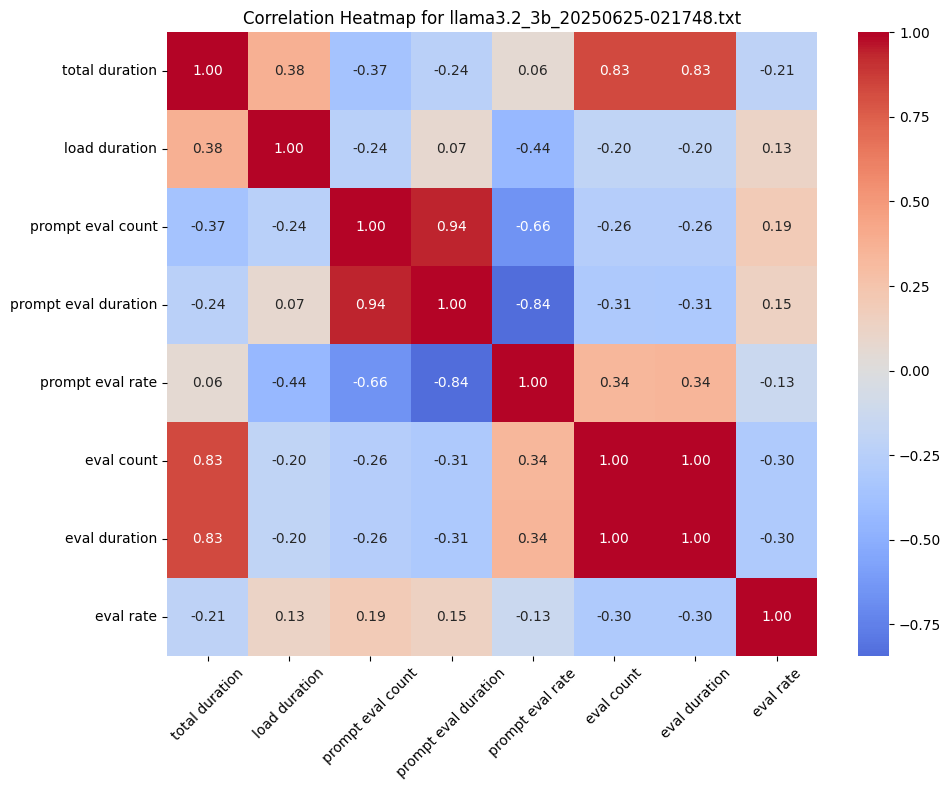

In [29]:
for key in df:
    # Select relevant numeric columns
    sub_df = df[key][[
        'total duration', 
        'load duration', 
        'prompt eval count', 
        'prompt eval duration',
        'prompt eval rate',
        'eval count', 
        'eval duration', 
        'eval rate'
    ]].copy()

    # Ensure all values are numeric (coerce errors to NaN)
    sub_df = sub_df.apply(pd.to_numeric, errors='coerce')

    # Drop rows with NaNs (optional but cleaner heatmap)
    sub_df.dropna(inplace=True)

    # Calculate correlation matrix
    corr = sub_df.corr()

    # Plot heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0)
    plt.title(f"Correlation Heatmap for {key}")
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

In [30]:
#Five numfber summary for each key in the dataframe

for key in df:
    print(f"\nFive-Number Summary for: {key}")

    # Select numeric columns only
    sub_df = df[key][[
        'total duration', 
        'load duration', 
        'prompt eval count', 
        'prompt eval duration',
        'prompt eval rate',
        'eval count', 
        'eval duration', 
        'eval rate'
    ]].copy()

    # Ensure all values are numeric
    sub_df = sub_df.apply(pd.to_numeric, errors='coerce')

    # Drop rows with missing values for clarity
    sub_df = sub_df.dropna()

    # Get the 5-number summary
    summary = sub_df.describe().loc[['min', '25%', '50%', '75%', 'max']]
    
    print(summary)



Five-Number Summary for: deepseek_20250624-160948.txt
     total duration  load duration  prompt eval count  prompt eval duration  \
min        1.000000       0.015108                8.0              0.413501   
25%       61.802017       0.015397               13.0              0.666119   
50%      128.620362       0.015597               17.0              0.875764   
75%      263.716835       0.016155               28.0              1.367231   
max     2812.293424       3.117660               50.0              2.643665   

     prompt eval rate  eval count  eval duration  eval rate  
min             18.37        86.0       1.000000       5.16  
25%             19.05       421.0      60.540037       5.60  
50%             19.41       910.0     127.236939       5.99  
75%             20.42      3418.0     263.080896       6.08  
max             20.95     81920.0    2811.027241       6.32  

Five-Number Summary for: gemma3_12b_20250625-004429.txt
     total duration  load duration  promp

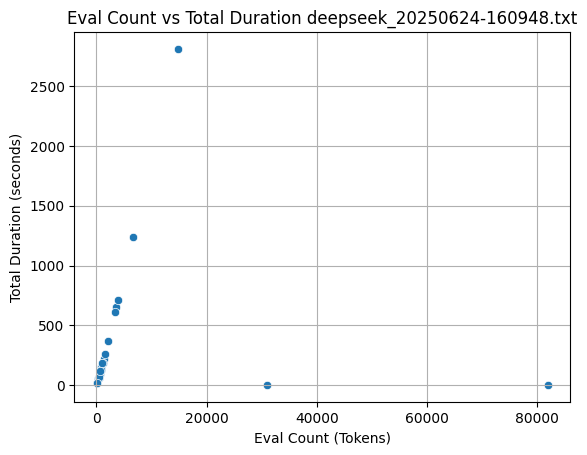

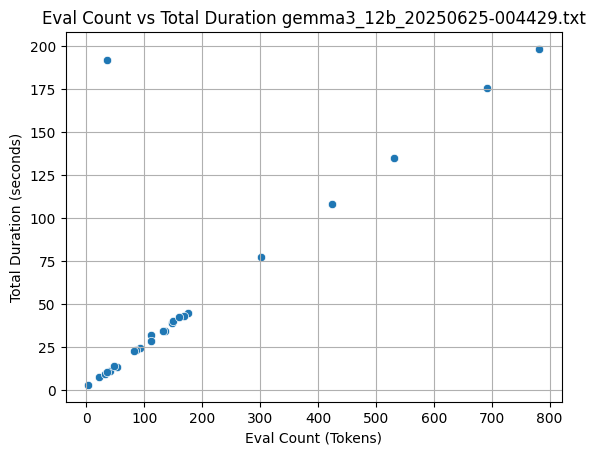

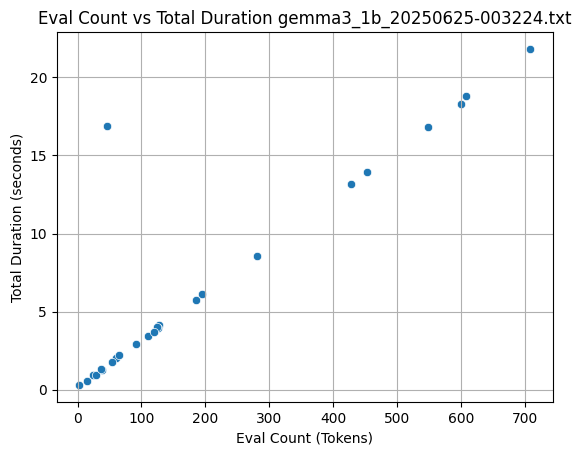

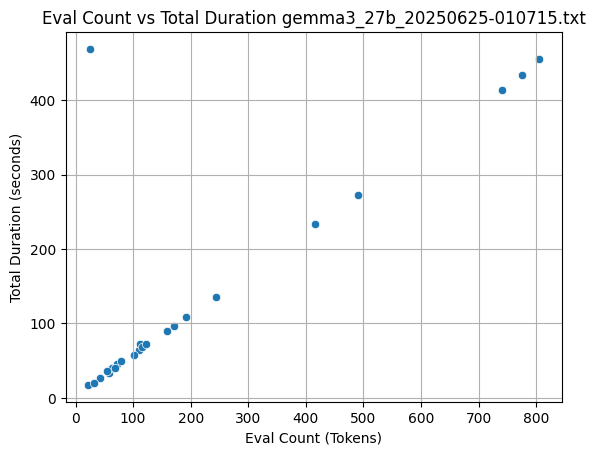

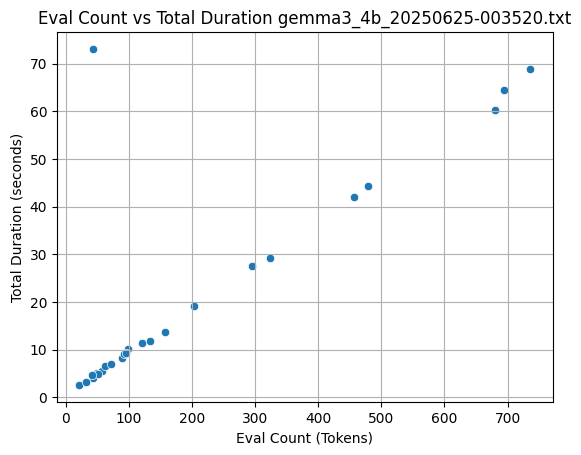

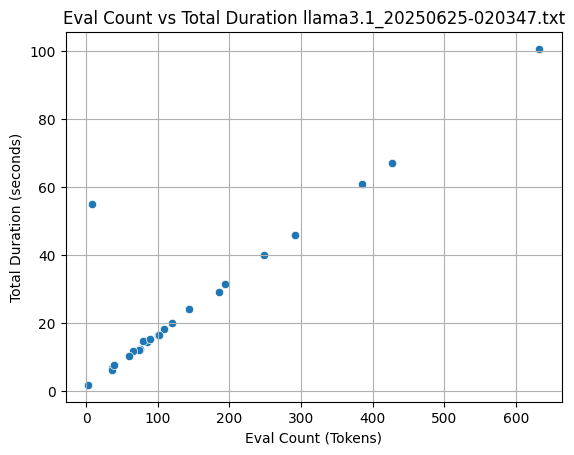

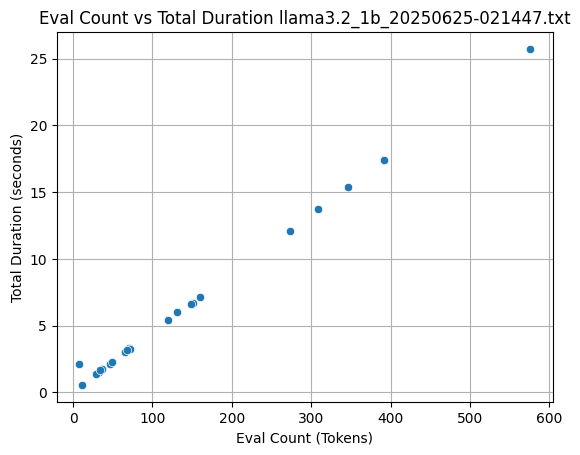

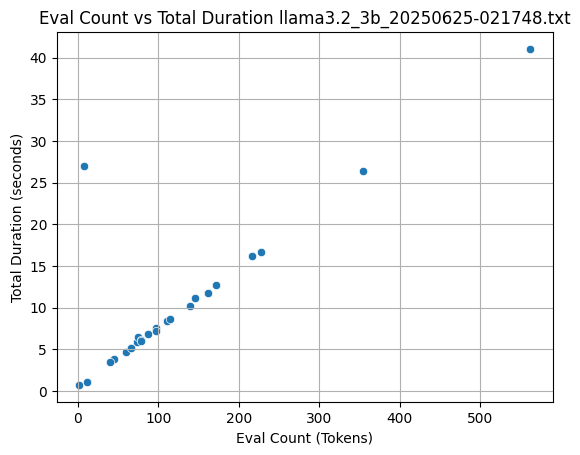

In [31]:
#Do models that process tokens faster spend less time, if not, there are inefficiencies in preprocesisng or loading

for key in df:
    # Ensure numeric types for both columns
    df[key]['eval count'] = pd.to_numeric(df[key]['eval count'], errors='coerce')
    df[key]['total duration'] = pd.to_numeric(df[key]['total duration'], errors='coerce')

    # Scatter plot of eval rate vs load duration
    sns.scatterplot(x=df[key]['eval count'], y=df[key]['total duration'])
    plt.title("Eval Count vs Total Duration " + key)
    plt.xlabel("Eval Count (Tokens)")
    plt.ylabel("Total Duration (seconds)")
    plt.grid(True)
    plt.show()


In [32]:
combined_data = []
# Combine all DataFrames into one for easier analysis

for key in df:
    temp = df[key][[
        'total duration',
        'load duration',
        'prompt eval count',
        'prompt eval duration',
        'prompt eval rate',
        'eval count',
        'eval duration',
        'eval rate'
    ]].copy()
    
    temp['Model'] = key  # Add model name as a column
    combined_data.append(temp)

# Concatenate all into one DataFrame
all_data = pd.concat(combined_data, ignore_index=True)

# Make sure the data is numeric
all_data = all_data.apply(pd.to_numeric, errors='ignore')



C:\Users\rickt\AppData\Local\Temp\ipykernel_13688\565784092.py:23: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  all_data = all_data.apply(pd.to_numeric, errors='ignore')


C:\Users\rickt\AppData\Local\Temp\ipykernel_13688\2747401783.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=all_data, x='Model', y=metric, inner='box', palette='Pastel1')


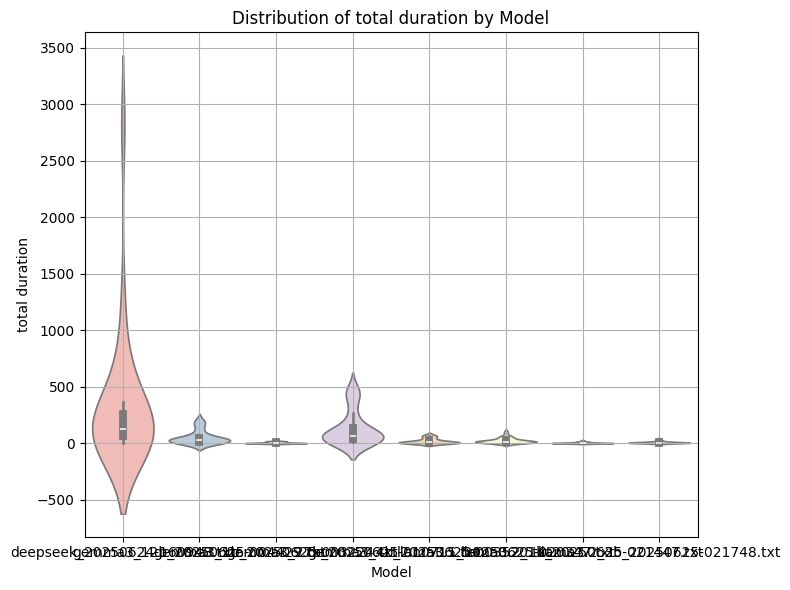

C:\Users\rickt\AppData\Local\Temp\ipykernel_13688\2747401783.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=all_data, x='Model', y=metric, inner='box', palette='Pastel1')


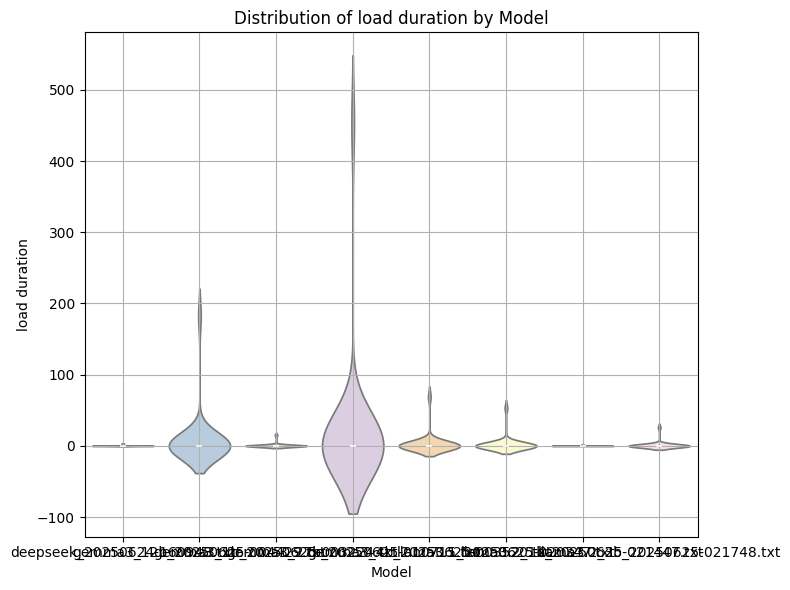

C:\Users\rickt\AppData\Local\Temp\ipykernel_13688\2747401783.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=all_data, x='Model', y=metric, inner='box', palette='Pastel1')


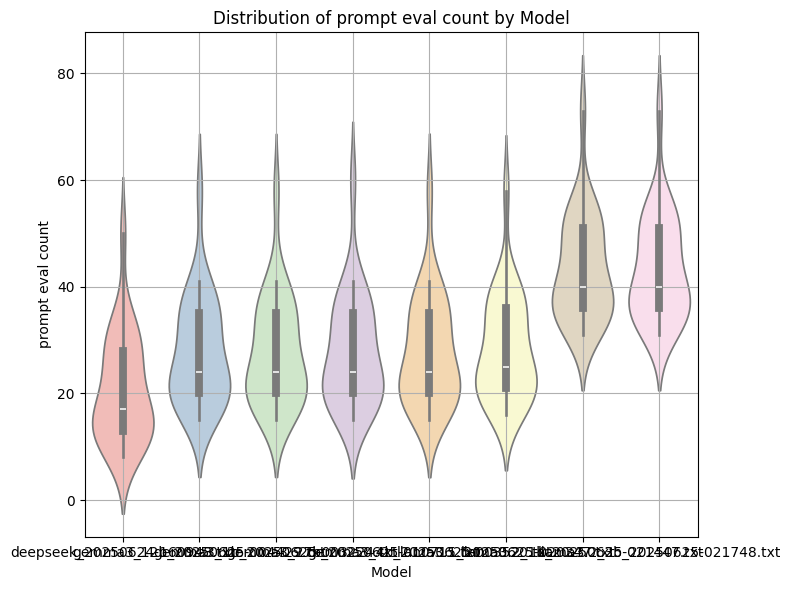

C:\Users\rickt\AppData\Local\Temp\ipykernel_13688\2747401783.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=all_data, x='Model', y=metric, inner='box', palette='Pastel1')


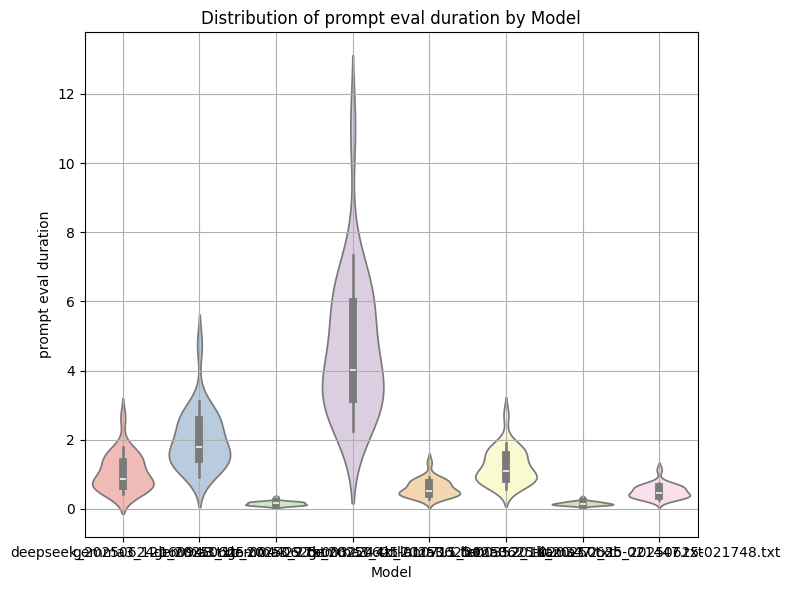

C:\Users\rickt\AppData\Local\Temp\ipykernel_13688\2747401783.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=all_data, x='Model', y=metric, inner='box', palette='Pastel1')


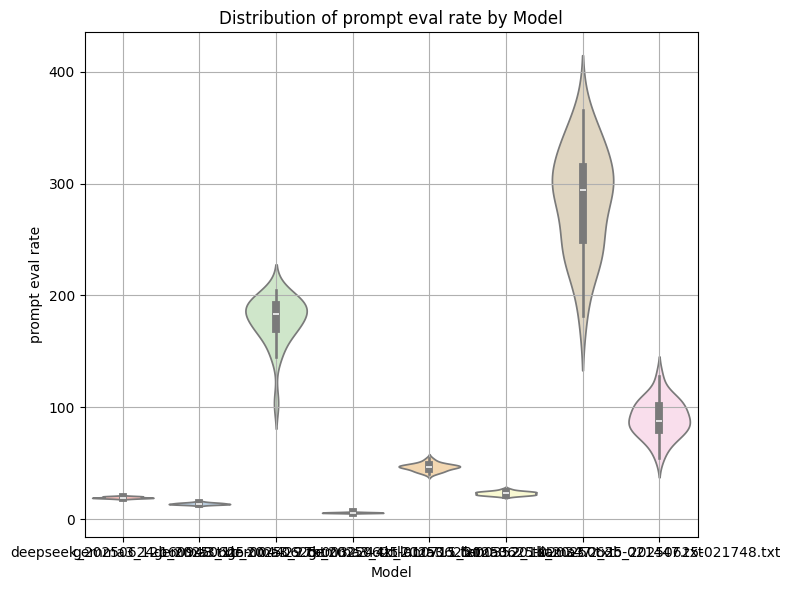

C:\Users\rickt\AppData\Local\Temp\ipykernel_13688\2747401783.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=all_data, x='Model', y=metric, inner='box', palette='Pastel1')


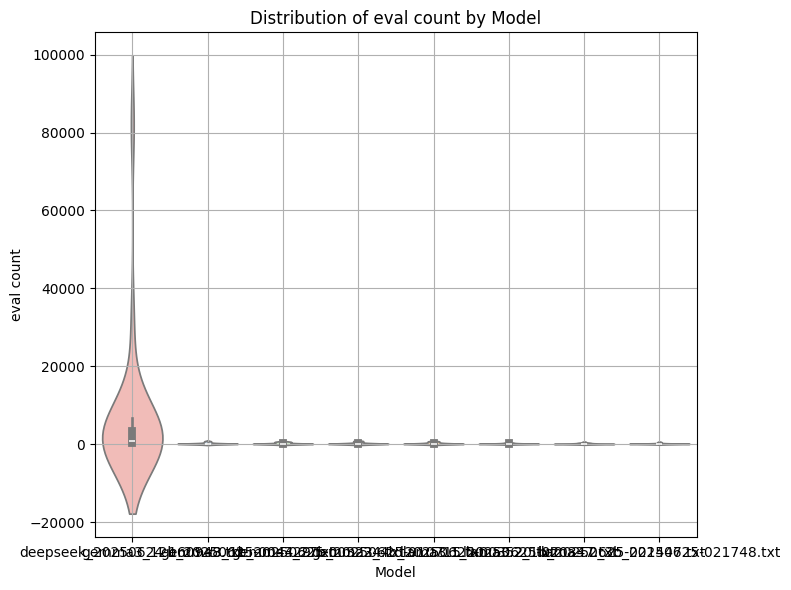

C:\Users\rickt\AppData\Local\Temp\ipykernel_13688\2747401783.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=all_data, x='Model', y=metric, inner='box', palette='Pastel1')


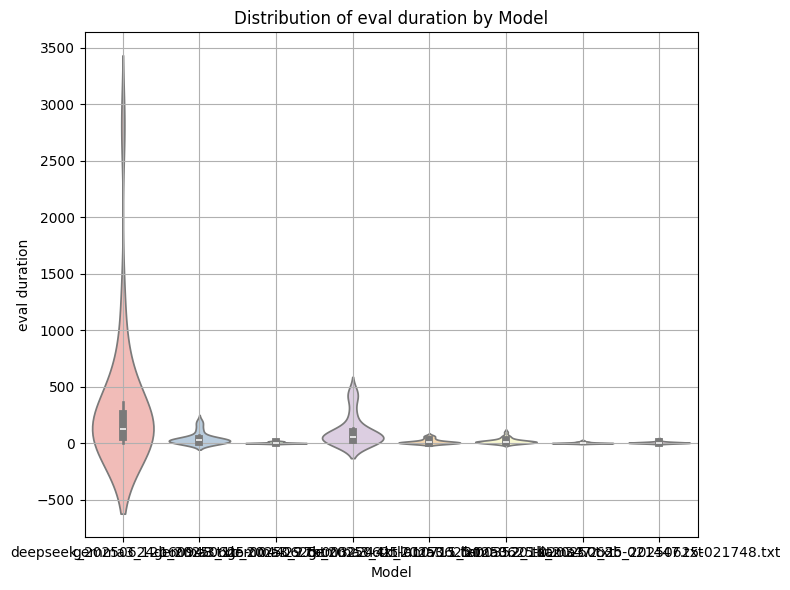

C:\Users\rickt\AppData\Local\Temp\ipykernel_13688\2747401783.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=all_data, x='Model', y=metric, inner='box', palette='Pastel1')


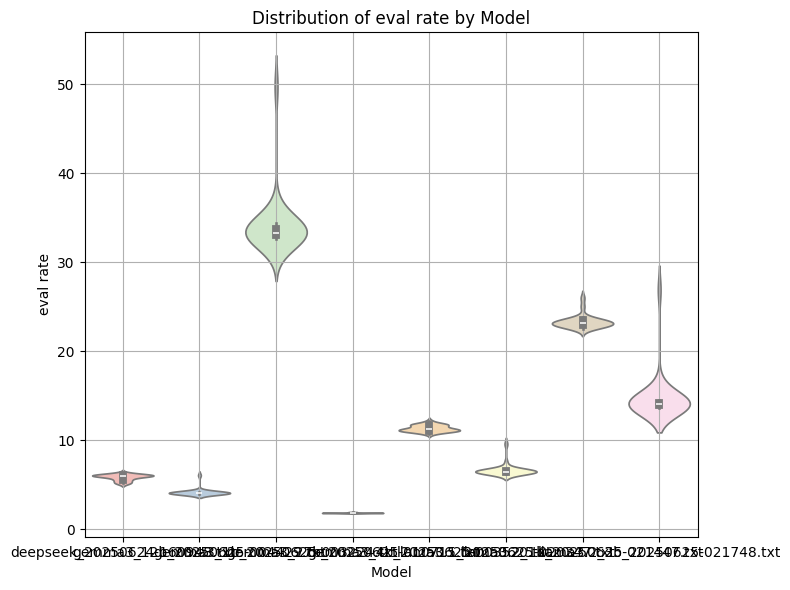

In [33]:
metrics = [ 'total duration', 'load duration', 'prompt eval count', 'prompt eval duration', 'prompt eval rate', 'eval count', 'eval duration', 'eval rate']

for metric in metrics:
    plt.figure(figsize=(8, 6))
    sns.violinplot(data=all_data, x='Model', y=metric, inner='box', palette='Pastel1')
    plt.title(f"Distribution of {metric} by Model")
    plt.xlabel("Model")
    plt.ylabel(metric)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

